In [1]:
#IMPORT NECESSARY LIBRARIES
import pandas as pd
import numpy as np
from scipy import stats
import math
import random

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

from scipy.stats import chi2_contingency

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv("C:/Users/91939/Downloads/RTA Dataset.csv/RTA Dataset.csv")

In [3]:
#NUMBER OF UNIQUE CLASSES FOR EACH FEATURE
for col in df.columns:
  print(col)
  print(df[col].unique())
  print("number of unique: ",len(df[col].unique()))
  print('\n')

Time
['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']
number of unique:  1074


Day_of_week
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
number of unique:  7


Age_band_of_driver
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
number of unique:  5


Sex_of_driver
['Male' 'Female' 'Unknown']
number of unique:  3


Educational_level
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
number of unique:  8


Vehicle_driver_relation
['Employee' 'Unknown' 'Owner' nan 'Other']
number of unique:  5


Driving_experience
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown']
number of unique:  8


Type_of_vehicle
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicl

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [5]:
#convert na to nan of Age_band_of_casualty
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].apply(lambda x: np.nan if x == 'na' else x)
print(sum(df['Age_band_of_casualty']=='na'))
sum(df['Age_band_of_casualty'].isnull())

0


4443

In [6]:
#convert na to nan of Sex_of_casualty
df['Sex_of_casualty'] = df['Sex_of_casualty'].apply(lambda x: np.nan if x == 'na' else x)
print(sum(df['Sex_of_casualty']=='na'))
sum(df['Sex_of_casualty'].isnull())

0


4443

In [7]:
#CHECKING NO. OF NULL AND UNKNOWN VALUES
for col in df.columns:
  n_instances=len(df[col])
  uk=['unknown','Unknown','Unknown or other','Other','other']
  if sum(df[col].isnull()) !=0 or sum(df[col].isin(uk)) != 0:
    print(col,'____', "null:",sum(df[col].isnull()),"unknown:",sum(df[col].isin(uk)))

Age_band_of_driver ____ null: 0 unknown: 1548
Sex_of_driver ____ null: 0 unknown: 178
Educational_level ____ null: 741 unknown: 100
Vehicle_driver_relation ____ null: 579 unknown: 137
Driving_experience ____ null: 829 unknown: 33
Type_of_vehicle ____ null: 950 unknown: 1208
Owner_of_vehicle ____ null: 482 unknown: 22
Service_year_of_vehicle ____ null: 3928 unknown: 2883
Defect_of_vehicle ____ null: 4427 unknown: 0
Area_accident_occured ____ null: 239 unknown: 3841
Lanes_or_Medians ____ null: 385 unknown: 1717
Road_allignment ____ null: 142 unknown: 0
Types_of_Junction ____ null: 887 unknown: 636
Road_surface_type ____ null: 172 unknown: 167
Weather_conditions ____ null: 0 unknown: 588
Type_of_collision ____ null: 155 unknown: 40
Vehicle_movement ____ null: 308 unknown: 1025
Sex_of_casualty ____ null: 4443 unknown: 0
Age_band_of_casualty ____ null: 4443 unknown: 0
Work_of_casuality ____ null: 3198 unknown: 482
Fitness_of_casuality ____ null: 2635 unknown: 18
Pedestrian_movement ____ nul

In [8]:
# Replace 'unknown' with NaN
uk=['unknown','Unknown','Unknown or other','Other','other']
for col in df.columns:
  if df[col].dtype in [np.float64, np.int64]:
    df[col] = df[col].replace(uk, np.nan).astype(float)  # Replace 'unknown' with NaN for numerical columns
  else:
    df[col] = df[col].replace(uk, np.nan)  # Replace 'unknown' with NaN for categorical columns

In [9]:
# Filling NAN Values in some columns with <5% missing values – Imputation with MEAN OR MODE
for col in df.columns:
  #uk=['unknown','Unknown','Unknown or other')]
  if sum(df[col].isnull()) !=0 :
    null=sum(df[col].isnull())
    if null<n_instances*5/100:
      if df[col].dtype in [np.float64, np.int64]:
        df[col]=df[col].fillna(df[col].mean())
      else: df[col]=df[col].fillna(df[col].mode().iloc[0])


In [10]:
#FINAL NULL COLUMNS- NUMBER- 15
null_col=[]
unreliable_col={}
for col in df.columns:
  #uk=['unknown','Unknown','Unknown or other')]
  if sum(df[col].isnull()) !=0:
    null_col.append(col)
    print(col,'____', "null:",sum(df[col].isnull()), "which is", round(100*sum(df[col].isnull())/n_instances,2),'%')
    if 100*sum(df[col].isnull())/n_instances>15: unreliable_col[col]=round(100*sum(df[col].isnull())/n_instances,2)

Age_band_of_driver ____ null: 1548 which is 12.57 %
Educational_level ____ null: 841 which is 6.83 %
Vehicle_driver_relation ____ null: 716 which is 5.81 %
Driving_experience ____ null: 862 which is 7.0 %
Type_of_vehicle ____ null: 2158 which is 17.52 %
Service_year_of_vehicle ____ null: 6811 which is 55.3 %
Defect_of_vehicle ____ null: 4427 which is 35.95 %
Area_accident_occured ____ null: 4080 which is 33.13 %
Lanes_or_Medians ____ null: 2102 which is 17.07 %
Types_of_Junction ____ null: 1523 which is 12.37 %
Vehicle_movement ____ null: 1333 which is 10.82 %
Sex_of_casualty ____ null: 4443 which is 36.08 %
Age_band_of_casualty ____ null: 4443 which is 36.08 %
Work_of_casuality ____ null: 3680 which is 29.88 %
Fitness_of_casuality ____ null: 2653 which is 21.54 %


In [11]:
#NULL VALUES > 15%
unreliable_col

{'Type_of_vehicle': 17.52,
 'Service_year_of_vehicle': 55.3,
 'Defect_of_vehicle': 35.95,
 'Area_accident_occured': 33.13,
 'Lanes_or_Medians': 17.07,
 'Sex_of_casualty': 36.08,
 'Age_band_of_casualty': 36.08,
 'Work_of_casuality': 29.88,
 'Fitness_of_casuality': 21.54}

In [12]:
#COLUMNS WITH NO NULL VALUES: OTHER_COLUMNS
other_col=set(list(df.columns))-set(null_col)
other_col

{'Accident_severity',
 'Casualty_class',
 'Casualty_severity',
 'Cause_of_accident',
 'Day_of_week',
 'Light_conditions',
 'Number_of_casualties',
 'Number_of_vehicles_involved',
 'Owner_of_vehicle',
 'Pedestrian_movement',
 'Road_allignment',
 'Road_surface_conditions',
 'Road_surface_type',
 'Sex_of_driver',
 'Time',
 'Type_of_collision',
 'Weather_conditions'}

In [13]:
col='Time'

'''Morning 6-12
afternoon 12-16:30
evening 16:30-22
midnight 22-6'''

time_intervals = [0, 6, 12, 16.5, 22, 24]
labels = ['Midnight_2', 'Morning', 'Afternoon', 'Evening', 'Midnight_1']

#'Time' column to pandas datetime
df[col] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour

df['Time_of_day'] = pd.cut(df['Hour'], bins=time_intervals, labels=labels, include_lowest=True)
df['Time_of_day'].replace({'Midnight_1': 'Midnight', 'Midnight_2': 'Midnight'}, inplace=True)
df.drop(columns=['Hour','Time'], inplace=True)

print(df['Time_of_day'])


0          Evening
1          Evening
2          Evening
3         Midnight
4         Midnight
           ...    
12311    Afternoon
12312      Evening
12313    Afternoon
12314    Afternoon
12315    Afternoon
Name: Time_of_day, Length: 12316, dtype: category
Categories (4, object): ['Midnight' < 'Morning' < 'Afternoon' < 'Evening']


C:\Users\91939\AppData\Local\Temp\ipykernel_22444\782487374.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df['Time'])
C:\Users\91939\AppData\Local\Temp\ipykernel_22444\782487374.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Time_of_day'].replace({'Midnight_1': 'Midnight', 'Midnight_2': 'Midnight'}, inplace=True)
C:\Users\91939\AppData\Local\Temp\i

In [14]:
#8 one hot cols in the null col
null_cols_onehot= ['Type_of_vehicle','Defect_of_vehicle',	'Types_of_Junction', 'Work_of_casuality','Vehicle_driver_relation','Vehicle_movement','Area_accident_occured','Sex_of_casualty']
# Filling NAN Values in some columns null_cols_onehot – Imputation with MEAN OR MODE
for col in null_cols_onehot:
  if sum(df[col].isnull()) !=0 :
    null=sum(df[col].isnull())
    if df[col].dtype in [np.float64, np.int64]:
      df[col]=df[col].fillna(df[col].mean())
    else: df[col]=df[col].fillna(df[col].mode().iloc[0])

In [15]:
#5 RELEVANT COLUMNS FROM OTHER_COLUMNS for logistic regression of missing values
#IMP
relevant_col= ['Time_of_day', 'Day_of_week','Sex_of_driver','Type_of_collision','Sex_of_casualty']
for col in relevant_col:
  print(col)
  print(df[col].unique())
  print("number of unique: ",len(df[col].unique()))
  print('\n')


Time_of_day
['Evening', 'Midnight', 'Afternoon', 'Morning']
Categories (4, object): ['Midnight' < 'Morning' < 'Afternoon' < 'Evening']
number of unique:  4


Day_of_week
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
number of unique:  7


Sex_of_driver
['Male' 'Female']
number of unique:  2


Type_of_collision
['Collision with roadside-parked vehicles'
 'Vehicle with vehicle collision' 'Collision with roadside objects'
 'Collision with animals' 'Rollover' 'Fall from vehicles'
 'Collision with pedestrians' 'With Train']
number of unique:  8


Sex_of_casualty
['Male' 'Female']
number of unique:  2




In [16]:
#ONE HOT

relevant_cols= ['Time_of_day', 'Day_of_week','Sex_of_driver','Type_of_collision','Sex_of_casualty']
#all here are one-hot
null_cols_onehot= ['Type_of_vehicle','Defect_of_vehicle',	'Types_of_Junction', 'Work_of_casuality','Vehicle_driver_relation','Vehicle_movement','Area_accident_occured']

r_col= relevant_cols

df_relevant = df[r_col].copy()
# Perform one-hot encoding with drop_first=True for each categorical feature
for col in r_col:
  if df_relevant[col].dtype in ['object','category']:
    encoded_cols = pd.get_dummies(df_relevant[col], prefix=col, drop_first=True)
    df_relevant = pd.concat([df_relevant, encoded_cols], axis=1)
    df_relevant.drop(columns=[col], inplace=True)

print(r_col)



['Time_of_day', 'Day_of_week', 'Sex_of_driver', 'Type_of_collision', 'Sex_of_casualty']


In [17]:
df_relevant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 18 columns):
 #   Column                                                     Non-Null Count  Dtype
---  ------                                                     --------------  -----
 0   Time_of_day_Morning                                        12316 non-null  bool 
 1   Time_of_day_Afternoon                                      12316 non-null  bool 
 2   Time_of_day_Evening                                        12316 non-null  bool 
 3   Day_of_week_Monday                                         12316 non-null  bool 
 4   Day_of_week_Saturday                                       12316 non-null  bool 
 5   Day_of_week_Sunday                                         12316 non-null  bool 
 6   Day_of_week_Thursday                                       12316 non-null  bool 
 7   Day_of_week_Tuesday                                        12316 non-null  bool 
 8   Day_of_week_Wednesday     

In [18]:
df_relevant.head()

,Time_of_day_Morning,Time_of_day_Afternoon,Time_of_day_Evening,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Sex_of_driver_Male,Type_of_collision_Collision with pedestrians,Type_of_collision_Collision with roadside objects,Type_of_collision_Collision with roadside-parked vehicles,Type_of_collision_Fall from vehicles,Type_of_collision_Rollover,Type_of_collision_Vehicle with vehicle collision,Type_of_collision_With Train,Sex_of_casualty_Male
0,False,False,True,True,False,False,False,False,False,True,False,False,True,False,False,False,False,True
1,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True
2,False,False,True,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True
3,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False
4,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True


In [19]:
null_col_new=[]
for col in df_relevant.columns:
    if df_relevant[col].isnull().any():
      null_col_new.append(col)
      print(col, '____', "null:", df_relevant[col].isnull().sum())


In [20]:
#convert NormalNormal to Normal
df['Fitness_of_casuality'] = df['Fitness_of_casuality'].apply(lambda x: 'Normal' if x == 'NormalNormal' else x)
sum(df['Fitness_of_casuality']=='NormalNormal')

0

In [21]:
null_col_label=list(set(null_col)-set(null_cols_onehot))

print(len(null_col_label))
for col in null_col_label:
  print(col)
  print(df[col].unique())
  print("number of unique: ",len(df[col].unique()))
  print('\n')


8
Driving_experience
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr']
number of unique:  7


Age_band_of_driver
['18-30' '31-50' 'Under 18' 'Over 51' nan]
number of unique:  5


Educational_level
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Illiterate' 'Writing & reading']
number of unique:  7


Fitness_of_casuality
[nan 'Normal' 'Deaf' 'Blind']
number of unique:  4


Lanes_or_Medians
[nan 'Undivided Two way' 'Double carriageway (median)' 'One way'
 'Two-way (divided with solid lines road marking)'
 'Two-way (divided with broken lines road marking)']
number of unique:  6


Sex_of_casualty
['Male' 'Female']
number of unique:  2


Age_band_of_casualty
[nan '31-50' '18-30' 'Under 18' 'Over 51' '5']
number of unique:  6


Service_year_of_vehicle
['Above 10yr' '5-10yrs' nan '1-2yr' '2-5yrs' 'Below 1yr']
number of unique:  6




In [22]:
#LABEL ENCODING
df_relevant = pd.concat([df_relevant, df[null_col_label]], axis=1)
label_encoder = preprocessing.LabelEncoder()

print(null_col_label)

custom_mappings = {
    'Driving_experience': {np.nan: 0, 'No Licence': 1, 'Below 1yr': 2, '1-2yr': 3, '2-5yr': 4, '5-10yr': 5, 'Above 10yr': 6},
    'Age_band_of_driver': {np.nan: 0, 'Under 18': 1, '18-30': 2, '31-50': 3, 'Over 51': 4},
    'Age_band_of_casualty': {np.nan: 0, '5': 1, 'Under 18': 2, '18-30': 3, '31-50': 4, 'Over 51': 5},
    'Educational_level': {np.nan: 0, 'Illiterate': 1, 'Writing & reading': 2, 'Elementary school': 3, 'Junior high school': 4, 'High school': 5, 'Above high school': 6},
    'Lanes_or_Medians': {np.nan: 0, 'Undivided Two way': 1, 'Two-way (divided with broken lines road marking)': 2, 'Two-way (divided with solid lines road marking)': 3, 'One way': 4, 'Double carriageway (median)': 5},
    'Service_year_of_vehicle': {np.nan: 0, 'Above 10yr': 1, '5-10yrs': 2, '2-5yrs': 3, '1-2yr': 4, 'Below 1yr': 5},
    'Fitness_of_casuality': {np.nan: 0, 'Normal': 1, 'Blind': 2, 'Deaf': 3, 'Other': 4}
}


# Create LabelEncoder object
label_encoder = preprocessing.LabelEncoder()

# Encode labels in columns of null_col_label using custom mapping
for col, mapping in custom_mappings.items():
    df_relevant[col] = df_relevant[col].map(mapping)
    #.fillna(df[col])

print(df_relevant.head())


['Driving_experience', 'Age_band_of_driver', 'Educational_level', 'Fitness_of_casuality', 'Lanes_or_Medians', 'Sex_of_casualty', 'Age_band_of_casualty', 'Service_year_of_vehicle']
   Time_of_day_Morning  Time_of_day_Afternoon  Time_of_day_Evening  \
0                False                  False                 True   
1                False                  False                 True   
2                False                  False                 True   
3                False                  False                False   
4                False                  False                False   

   Day_of_week_Monday  Day_of_week_Saturday  Day_of_week_Sunday  \
0                True                 False               False   
1                True                 False               False   
2                True                 False               False   
3               False                 False                True   
4               False                 False                True 

In [23]:
null_col_label

['Driving_experience',
 'Age_band_of_driver',
 'Educational_level',
 'Fitness_of_casuality',
 'Lanes_or_Medians',
 'Sex_of_casualty',
 'Age_band_of_casualty',
 'Service_year_of_vehicle']

In [24]:
#just a check
null_col_new=[]
for col in df_relevant.columns:
    if df_relevant[col].isnull().any():
      null_col_new.append(col)
      print(col, '____', "null:", df_relevant[col].isnull().sum())


In [25]:
null_col_label

['Driving_experience',
 'Age_band_of_driver',
 'Educational_level',
 'Fitness_of_casuality',
 'Lanes_or_Medians',
 'Sex_of_casualty',
 'Age_band_of_casualty',
 'Service_year_of_vehicle']

In [26]:
print('\n')
for col in null_col_label:
    if df_relevant[col].isin([0]).any():
      null_col_new.append(col)
      print(col, '____', "null:", df_relevant[col].isin([0]).sum())
#PROGRESS IS HERE



Driving_experience ____ null: 862
Age_band_of_driver ____ null: 1548
Educational_level ____ null: 841
Fitness_of_casuality ____ null: 2653
Lanes_or_Medians ____ null: 2102
Age_band_of_casualty ____ null: 4443
Service_year_of_vehicle ____ null: 6811


In [27]:
null_col_new

['Driving_experience',
 'Age_band_of_driver',
 'Educational_level',
 'Fitness_of_casuality',
 'Lanes_or_Medians',
 'Age_band_of_casualty',
 'Service_year_of_vehicle']

In [28]:
for col in null_col_label:
  print(col, "____", "null:", sum(df_relevant[col].isin([0])))

Driving_experience ____ null: 862
Age_band_of_driver ____ null: 1548
Educational_level ____ null: 841
Fitness_of_casuality ____ null: 2653
Lanes_or_Medians ____ null: 2102
Sex_of_casualty ____ null: 0
Age_band_of_casualty ____ null: 4443
Service_year_of_vehicle ____ null: 6811


In [ ]:
##FILLING OF MISSING VALUES


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# Initialize the models
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Define the voting classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', lr), 
    ('rf', rf), 
    ('gb', gb)], 
    voting='soft' # 'soft' uses predicted probabilities for averaging
)

# Loop through the columns with NaN values
for col in null_col_label:
    df_lr = df_relevant.copy()
    n_col = null_col_label.copy()
    n_col.remove(str(col))
    print(n_col)
    df_lr.drop(columns=n_col, inplace=True)
    
    # Prepare the train and test datasets
    testdf = df_lr[df_lr[col].isin([0])==True].copy()
    traindf = df_lr[df_lr[col].isin([0])==False].copy()

    y_train = traindf[col]
    X_train = traindf.drop(col, axis=1)

    if not testdf.empty:
        X_test = testdf.drop(col, axis=1)
        
        # Fit the voting classifier on the training data
        voting_clf.fit(X_train, y_train)
        
        # Predict using the voting classifier
        pred = voting_clf.predict(X_test)

        # Fill the missing values in the original dataframe
        if len(testdf.index) == len(pred):
            df_relevant.loc[testdf.index, col] = pred
        else:
            print("Length of testdf.index does not match the length of pred.")

    print(col, "____", "null:", sum(df_relevant[col].isin([0])))


['Age_band_of_driver', 'Educational_level', 'Fitness_of_casuality', 'Lanes_or_Medians', 'Sex_of_casualty', 'Age_band_of_casualty', 'Service_year_of_vehicle']
Driving_experience ____ null: 0
['Driving_experience', 'Educational_level', 'Fitness_of_casuality', 'Lanes_or_Medians', 'Sex_of_casualty', 'Age_band_of_casualty', 'Service_year_of_vehicle']
Age_band_of_driver ____ null: 0
['Driving_experience', 'Age_band_of_driver', 'Fitness_of_casuality', 'Lanes_or_Medians', 'Sex_of_casualty', 'Age_band_of_casualty', 'Service_year_of_vehicle']
Educational_level ____ null: 0
['Driving_experience', 'Age_band_of_driver', 'Educational_level', 'Lanes_or_Medians', 'Sex_of_casualty', 'Age_band_of_casualty', 'Service_year_of_vehicle']
Fitness_of_casuality ____ null: 0
['Driving_experience', 'Age_band_of_driver', 'Educational_level', 'Fitness_of_casuality', 'Sex_of_casualty', 'Age_band_of_casualty', 'Service_year_of_vehicle']
Lanes_or_Medians ____ null: 0
['Driving_experience', 'Age_band_of_driver', 'Educ

In [30]:
for col in null_col_label:
      print(col, '____', "null:", (df_relevant[col].isin([0]).sum())==0)

Driving_experience ____ null: True
Age_band_of_driver ____ null: True
Educational_level ____ null: True
Fitness_of_casuality ____ null: True
Lanes_or_Medians ____ null: True
Sex_of_casualty ____ null: True
Age_band_of_casualty ____ null: True
Service_year_of_vehicle ____ null: True


In [31]:
for col in df_relevant.columns:
      #print((df_relevant[col].isnull().sum()==0))
      if (df_relevant[col].isnull().sum()==0) is False: print(col,"NaN values still there: ERROR")

In [32]:
one_hot_columns=list(df_relevant.columns)
one_hot_columns

['Time_of_day_Morning',
 'Time_of_day_Afternoon',
 'Time_of_day_Evening',
 'Day_of_week_Monday',
 'Day_of_week_Saturday',
 'Day_of_week_Sunday',
 'Day_of_week_Thursday',
 'Day_of_week_Tuesday',
 'Day_of_week_Wednesday',
 'Sex_of_driver_Male',
 'Type_of_collision_Collision with pedestrians',
 'Type_of_collision_Collision with roadside objects',
 'Type_of_collision_Collision with roadside-parked vehicles',
 'Type_of_collision_Fall from vehicles',
 'Type_of_collision_Rollover',
 'Type_of_collision_Vehicle with vehicle collision',
 'Type_of_collision_With Train',
 'Sex_of_casualty_Male',
 'Driving_experience',
 'Age_band_of_driver',
 'Educational_level',
 'Fitness_of_casuality',
 'Lanes_or_Medians',
 'Sex_of_casualty',
 'Age_band_of_casualty',
 'Service_year_of_vehicle']

In [33]:
# Default values for missing entries
default_values = ['Time_of_day_Morning', 'Day_of_week_Friday', 'Sex_of_driver_Female', 'Type_of_collision_Collision with animals', 'Sex_of_casualty_Female']
L=[['Time_of_day_Afternoon', 'Time_of_day_Evening', 'Time_of_day_Midnight'],['Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday',
    'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday'],['Sex_of_driver_Male'],['Type_of_collision_Collision with pedestrians',
    'Type_of_collision_Collision with roadside objects',
    'Type_of_collision_Collision with roadside-parked vehicles',
    'Type_of_collision_Fall from vehicles', 'Type_of_collision_Rollover',
    'Type_of_collision_Vehicle with vehicle collision',
    'Type_of_collision_With Train'],['Sex_of_casualty_Male', 'Sex_of_casualty_na']]

In [34]:
len(L)

5

In [35]:
# Reverse one-hot encoding
df_relevant['Time_of_day'] = df_relevant.apply(lambda x: 'Morning' if x['Time_of_day_Morning'] == 1 else 'Afternoon' if x['Time_of_day_Afternoon'] == 1 else 'Evening' if x['Time_of_day_Evening'] == 1 else 'Midnight', axis=1)
df_relevant['Day_of_week'] = df_relevant.apply(lambda x: 'Monday' if x['Day_of_week_Monday'] == 1 else 'Tuesday' if x['Day_of_week_Tuesday'] == 1 else 'Wednesday' if x['Day_of_week_Wednesday'] == 1 else 'Thursday' if x['Day_of_week_Thursday'] == 1 else 'Sunday' if x['Day_of_week_Sunday'] == 1 else 'Saturday' if x['Day_of_week_Saturday'] == 1 else 'Friday', axis=1)
df_relevant['Sex_of_driver'] = df_relevant.apply(lambda x: 'Male' if x['Sex_of_driver_Male'] == 1 else 'Female', axis=1)
df_relevant['Type_of_collision'] = df_relevant.apply(lambda x: 'Collision with pedestrians' if x['Type_of_collision_Collision with pedestrians'] == 1 else 'Collision with roadside objects' if x['Type_of_collision_Collision with roadside objects'] == 1 else 'Collision with roadside-parked vehicles' if x['Type_of_collision_Collision with roadside-parked vehicles'] == 1 else 'Fall from vehicles' if x['Type_of_collision_Fall from vehicles'] == 1 else 'Rollover' if x['Type_of_collision_Rollover'] == 1 else 'Vehicle with vehicle collision' if x['Type_of_collision_Vehicle with vehicle collision'] == 1 else 'With Train' if x['Type_of_collision_With Train'] == 1 else 'Collision with animals', axis=1)
df_relevant['Sex_of_casualty'] = df_relevant.apply(lambda x: 'Male' if x['Sex_of_casualty_Male'] == 1 else 'Female', axis=1)




In [36]:
col=list(set(one_hot_columns) - set(['Age_band_of_driver',
'Age_band_of_casualty',
'Lanes_or_Medians',
'Driving_experience',
'Service_year_of_vehicle',
'Educational_level',
'Fitness_of_casuality']))
col

['Time_of_day_Evening',
 'Type_of_collision_Collision with roadside-parked vehicles',
 'Day_of_week_Tuesday',
 'Time_of_day_Afternoon',
 'Type_of_collision_Collision with pedestrians',
 'Type_of_collision_Vehicle with vehicle collision',
 'Type_of_collision_Fall from vehicles',
 'Sex_of_driver_Male',
 'Day_of_week_Monday',
 'Day_of_week_Thursday',
 'Day_of_week_Saturday',
 'Sex_of_casualty_Male',
 'Type_of_collision_With Train',
 'Type_of_collision_Rollover',
 'Type_of_collision_Collision with roadside objects',
 'Time_of_day_Morning',
 'Day_of_week_Wednesday',
 'Day_of_week_Sunday',
 'Sex_of_casualty']

In [37]:
cols=list(col)
# Drop one-hot encoded columns
df_relevant.drop(columns=cols, inplace=True)

In [38]:
df_relevant.columns

Index(['Driving_experience', 'Age_band_of_driver', 'Educational_level',
       'Fitness_of_casuality', 'Lanes_or_Medians', 'Age_band_of_casualty',
       'Service_year_of_vehicle', 'Time_of_day', 'Day_of_week',
       'Sex_of_driver', 'Type_of_collision'],
      dtype='object')

In [39]:
#NUMBER OF UNIQUE CLASSES FOR EACH FEATURE
for col in df_relevant.columns:
  print(col)
  print(df_relevant[col].unique())
  print("number of unique: ",len(df_relevant[col].unique()))
  print('\n')

Driving_experience
[3 6 5 4 1 2]
number of unique:  6


Age_band_of_driver
[2 3 1 4]
number of unique:  4


Educational_level
[6 4 3 5 1 2]
number of unique:  6


Fitness_of_casuality
[1 3 2]
number of unique:  3


Lanes_or_Medians
[2 1 5 4 3]
number of unique:  5


Age_band_of_casualty
[3 4 2 5 1]
number of unique:  5


Service_year_of_vehicle
[1 2 3 4 5]
number of unique:  5


Time_of_day
['Evening' 'Midnight' 'Afternoon' 'Morning']
number of unique:  4


Day_of_week
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
number of unique:  7


Sex_of_driver
['Male' 'Female']
number of unique:  2


Type_of_collision
['Collision with roadside-parked vehicles'
 'Vehicle with vehicle collision' 'Collision with roadside objects'
 'Collision with animals' 'Rollover' 'Fall from vehicles'
 'Collision with pedestrians' 'With Train']
number of unique:  8




In [40]:
df.drop(columns=df_relevant.columns, inplace=True)
df = pd.concat([df, df_relevant], axis=1)

In [41]:
print(len(df.columns))
df.columns

32


Index(['Vehicle_driver_relation', 'Type_of_vehicle', 'Owner_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions',
       'Light_conditions', 'Weather_conditions', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Casualty_severity', 'Work_of_casuality',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity',
       'Driving_experience', 'Age_band_of_driver', 'Educational_level',
       'Fitness_of_casuality', 'Lanes_or_Medians', 'Age_band_of_casualty',
       'Service_year_of_vehicle', 'Time_of_day', 'Day_of_week',
       'Sex_of_driver', 'Type_of_collision'],
      dtype='object')

In [42]:
#CHECKING NO. OF NULL AND UNKNOWN VALUES
for col in df.columns:
  n_instances=len(df[col])
  uk=['unknown','Unknown','Unknown or other','Other','other']
  if sum(df[col].isnull()) !=0 or sum(df[col].isin(uk)) != 0:
    print(col,'____', "null:",sum(df[col].isnull()),"unknown:",sum(df[col].isin(uk)))

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Vehicle_driver_relation      12316 non-null  object 
 1   Type_of_vehicle              12316 non-null  object 
 2   Owner_of_vehicle             12316 non-null  object 
 3   Defect_of_vehicle            12316 non-null  object 
 4   Area_accident_occured        12316 non-null  object 
 5   Road_allignment              12316 non-null  object 
 6   Types_of_Junction            12316 non-null  object 
 7   Road_surface_type            12316 non-null  object 
 8   Road_surface_conditions      12316 non-null  object 
 9   Light_conditions             12316 non-null  object 
 10  Weather_conditions           12316 non-null  object 
 11  Number_of_vehicles_involved  12316 non-null  float64
 12  Number_of_casualties         12316 non-null  float64
 13  Vehicle_movement

In [44]:
df.to_csv('Cleaned_Data_raj.csv', index=False)

In [45]:
# STATISTICAL ANALYSIS

# 1. Descriptive Statistical Analysis
descriptive_stats = df.describe()
descriptive_stats


,Number_of_vehicles_involved,Number_of_casualties,Driving_experience,Age_band_of_driver,Educational_level,Fitness_of_casuality,Lanes_or_Medians,Age_band_of_casualty,Service_year_of_vehicle
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,2.040679,1.548149,4.316093,2.588828,3.933664,1.004547,2.065200,3.255359,2.708184
std,0.688790,1.007179,1.281824,0.805776,0.684899,0.087248,1.166269,0.800015,0.877990
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,3.000000,2.000000,4.000000,1.000000,1.000000,3.000000,2.000000
50%,2.000000,1.000000,5.000000,3.000000,4.000000,1.000000,2.000000,3.000000,3.000000
75%,2.000000,2.000000,5.000000,3.000000,4.000000,1.000000,2.000000,4.000000,3.000000
max,7.000000,8.000000,6.000000,4.000000,6.000000,3.000000,5.000000,5.000000,5.000000


count             12316
unique                3
top       Slight Injury
freq              10415
Name: Accident_severity, dtype: object


There are 10415 Slight Injury instances, which is 84.56% of the total
There are 1743 Serious Injury instances, which is 14.15% of the total
There are 158 Fatal injury instances, which is 1.28% of the total


C:\Users\91939\AppData\Local\Temp\ipykernel_22444\287290142.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Accident_severity', palette=custom_palette)
C:\Users\91939\AppData\Local\Temp\ipykernel_22444\287290142.py:22: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  ax = sns.countplot(data=df, x='Accident_severity', palette=custom_palette)


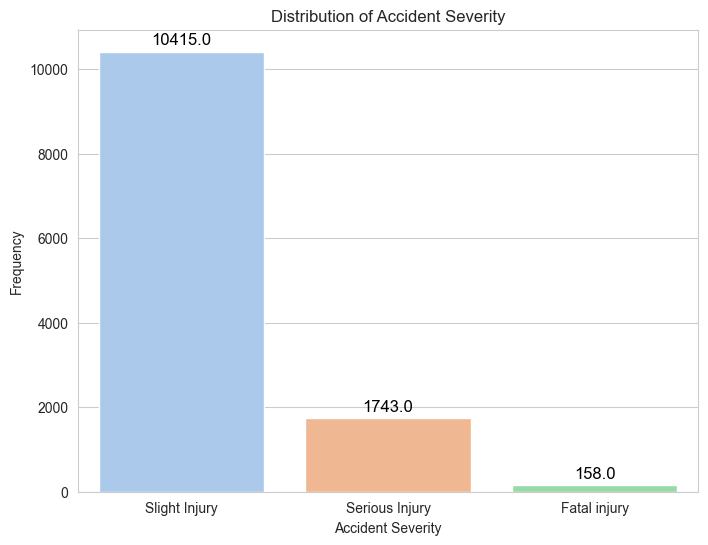

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute descriptive statistics for 'Accident_severity'
severity_stats = df['Accident_severity'].describe()
print(severity_stats)

# Calculate and print the distribution of each unique value in 'Accident_severity'
v = list(df['Accident_severity'].unique())
print("\n")
for x in v:
    count = sum(df['Accident_severity'] == x)
    percentage = round((100 * count / df.shape[0]), 2)
    print(f"There are {count} {x} instances, which is {percentage}% of the total")

# Set the color palette to a custom light color scheme
custom_palette = sns.color_palette("pastel")

# Create a count plot with a custom color palette
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Accident_severity', palette=custom_palette)

# Add frequency counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Set plot titles and labels
plt.title('Distribution of Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Frequency')

# Show the plot
plt.show()




There are 2744 No distancing instances, which is 22.28% of the total
There are 1808 Changing lane to the right instances, which is 14.68% of the total
There are 1473 Changing lane to the left instances, which is 11.96% of the total
There are 1402 Driving carelessly instances, which is 11.38% of the total
There are 1207 No priority to vehicle instances, which is 9.8% of the total
There are 1137 Moving Backward instances, which is 9.23% of the total
There are 721 No priority to pedestrian instances, which is 5.85% of the total
There are 430 Overtaking instances, which is 3.49% of the total
There are 340 Driving under the influence of drugs instances, which is 2.76% of the total
There are 284 Driving to the left instances, which is 2.31% of the total
There are 197 Getting off the vehicle improperly instances, which is 1.6% of the total
There are 174 Driving at high speed instances, which is 1.41% of the total
There are 149 Overturning instances, which is 1.21% of the total
There are 78 

C:\Users\91939\AppData\Local\Temp\ipykernel_22444\4071204768.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Cause_of_accident', palette=custom_palette, order=sorted(v, key=lambda x: sum(df['Cause_of_accident'] == x), reverse=True))
C:\Users\91939\AppData\Local\Temp\ipykernel_22444\4071204768.py:18: UserWarning: 
The palette list has fewer values (10) than needed (18) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(data=df, x='Cause_of_accident', palette=custom_palette, order=sorted(v, key=lambda x: sum(df['Cause_of_accident'] == x), reverse=True))
C:\Users\91939\AppData\Local\Temp\ipykernel_22444\4071204768.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),

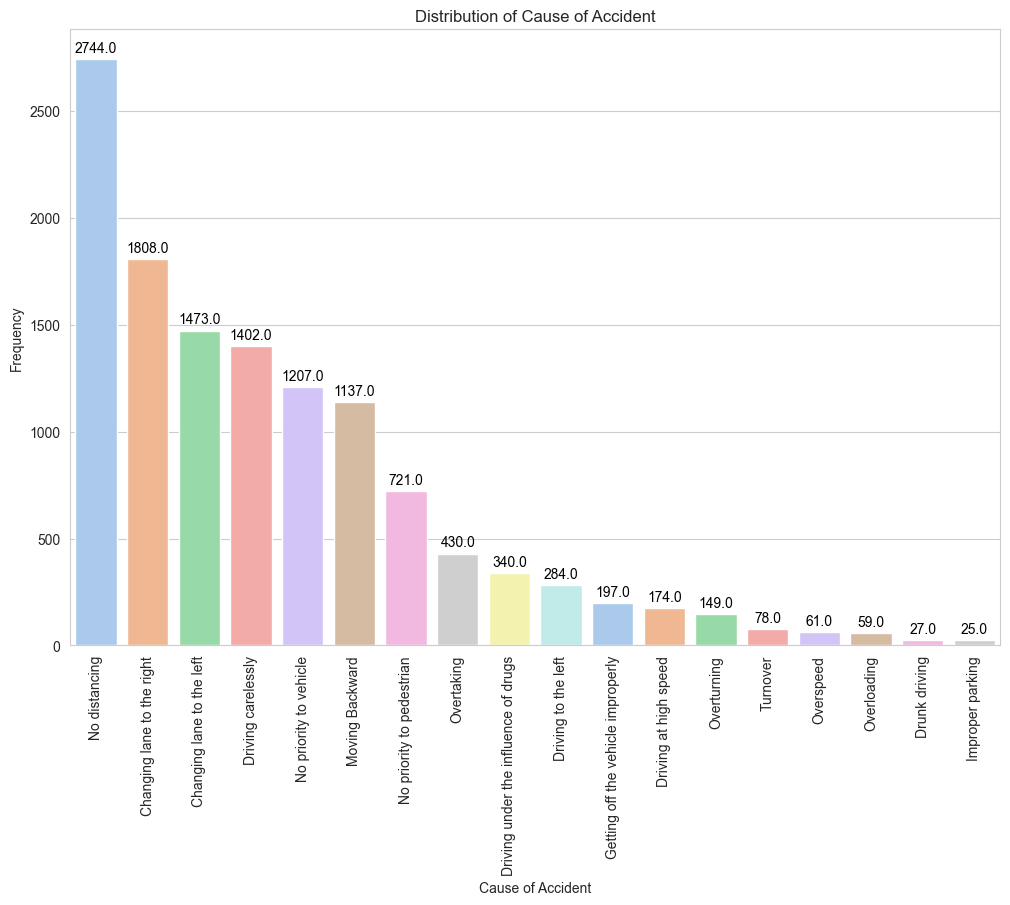

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate and print the distribution of each unique value in 'Cause_of_accident'
v = list(df['Cause_of_accident'].unique())
print("\n")
for x in sorted(v, key=lambda x: sum(df['Cause_of_accident'] == x), reverse=True):
    count = sum(df['Cause_of_accident'] == x)
    percentage = round((100 * count / df.shape[0]), 2)
    print(f"There are {count} {x} instances, which is {percentage}% of the total")

# Set the color palette to a custom light color scheme
custom_palette = sns.color_palette("pastel")

# Create a count plot with a custom color palette
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))  # Adjust figure size as necessary
ax = sns.countplot(data=df, x='Cause_of_accident', palette=custom_palette, order=sorted(v, key=lambda x: sum(df['Cause_of_accident'] == x), reverse=True))

# Add frequency counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Set plot titles and labels
plt.title('Distribution of Cause of Accident')
plt.xlabel('Cause of Accident')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Show the plot
plt.show()


In [48]:
# 2. Frequency Counts for Categorical Variables
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    freq_counts = df[col].value_counts()
    print("\nMODE or Highest frequency value for column",col, ":", freq_counts.idxmax(),"with frequency",round(100*freq_counts.max()/df.shape[0],2),'% and count',freq_counts.max())
    print("___________________________________\n",freq_counts)


MODE or Highest frequency value for column Vehicle_driver_relation : Employee with frequency 83.98 % and count 10343
___________________________________
 Vehicle_driver_relation
Employee    10343
Owner        1973
Name: count, dtype: int64

MODE or Highest frequency value for column Type_of_vehicle : Automobile with frequency 43.54 % and count 5363
___________________________________
 Type_of_vehicle
Automobile              5363
Lorry (41?100Q)         2186
Pick up upto 10Q         811
Public (12 seats)        711
Stationwagen             687
Lorry (11?40Q)           541
Public (13?45 seats)     532
Public (> 45 seats)      404
Long lorry               383
Taxi                     265
Motorcycle               177
Special vehicle           84
Ridden horse              76
Turbo                     46
Bajaj                     29
Bicycle                   21
Name: count, dtype: int64

MODE or Highest frequency value for column Owner_of_vehicle : Owner with frequency 89.01 % and count 109

C:\Users\91939\AppData\Local\Temp\ipykernel_22444\2913979342.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], palette='Pastel1')
C:\Users\91939\AppData\Local\Temp\ipykernel_22444\2913979342.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], palette='Pastel1')
C:\Users\91939\AppData\Local\Temp\ipykernel_22444\2913979342.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[

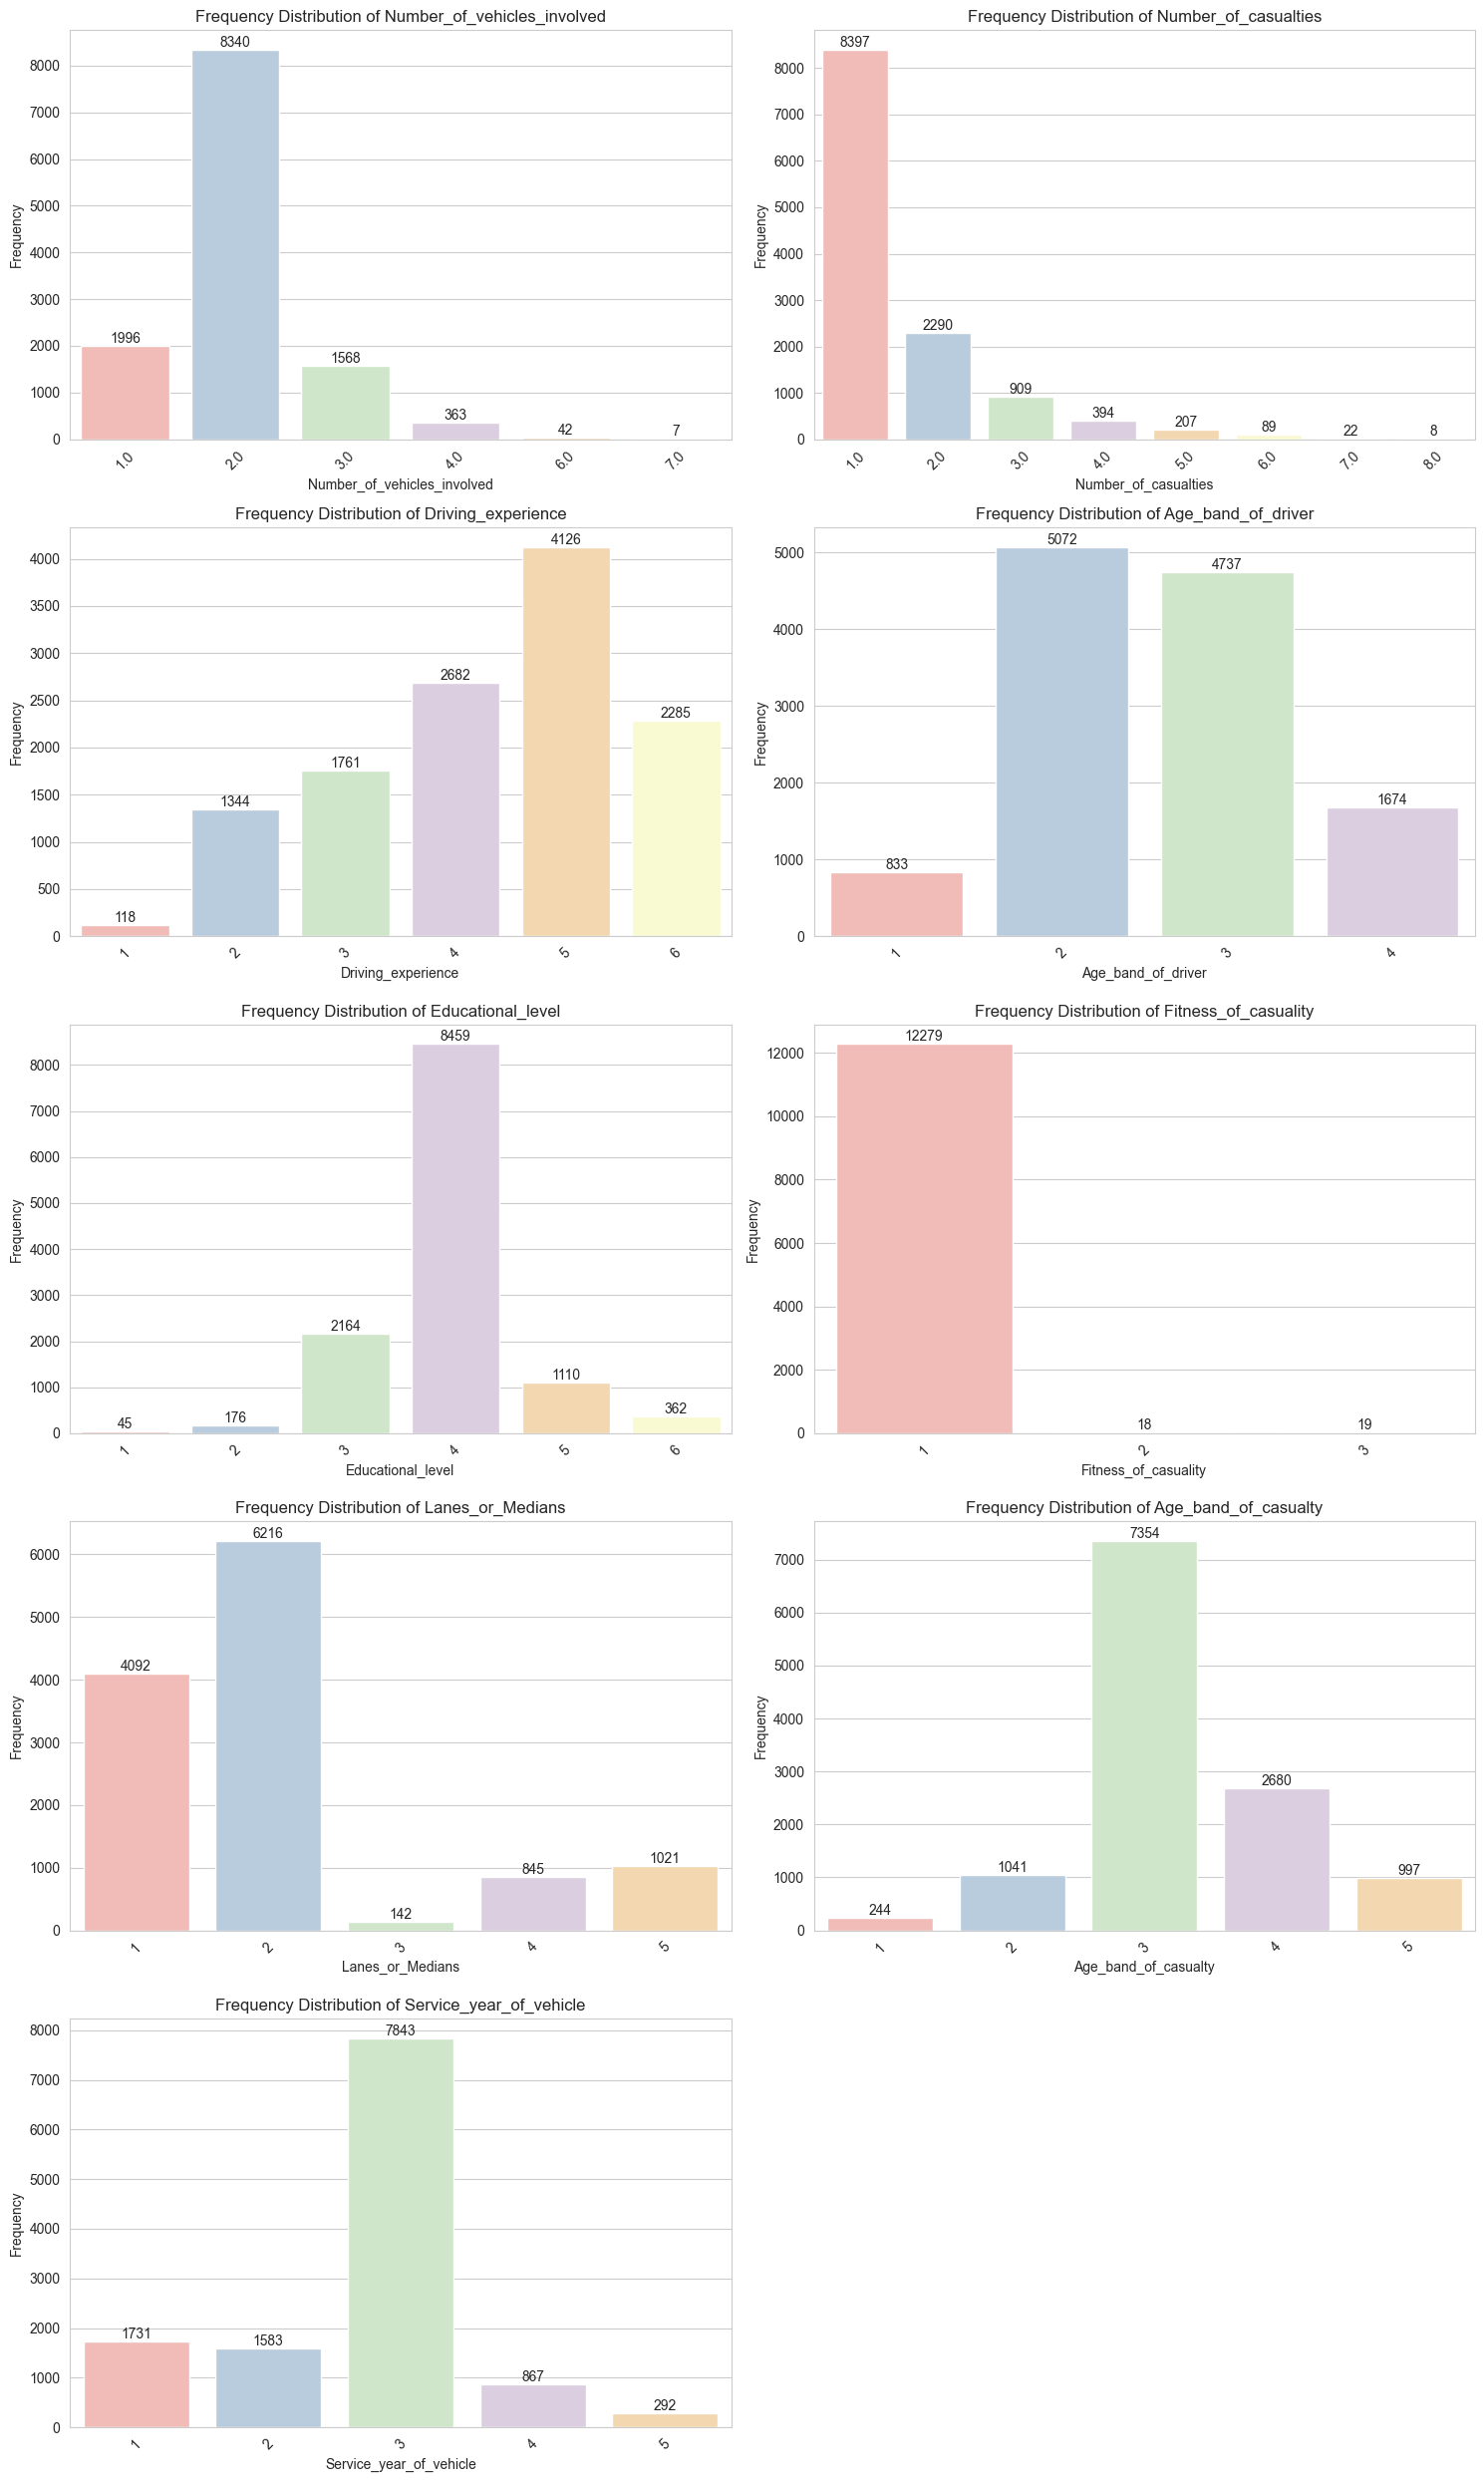

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Visualize the distribution of numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

num_cols_per_row = 2
num_rows = (len(numerical_cols) + num_cols_per_row - 1) // num_cols_per_row

fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(15, 5 * num_rows))

axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    # Calculate frequency counts
    value_counts = df[col].value_counts().sort_index()

    # Create bar plot with a light color palette
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], palette='Pastel1')

    axes[i].set_title(f'Frequency Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

    # Rotate x-axis labels if they're too long
    axes[i].tick_params(axis='x', rotation=45)

    # Add value labels on top of each bar
    for j, v in enumerate(value_counts.values):
        axes[i].text(j, v, str(v), ha='center', va='bottom')

# Remove any unused subplots
for j in range(len(numerical_cols), num_rows * num_cols_per_row):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


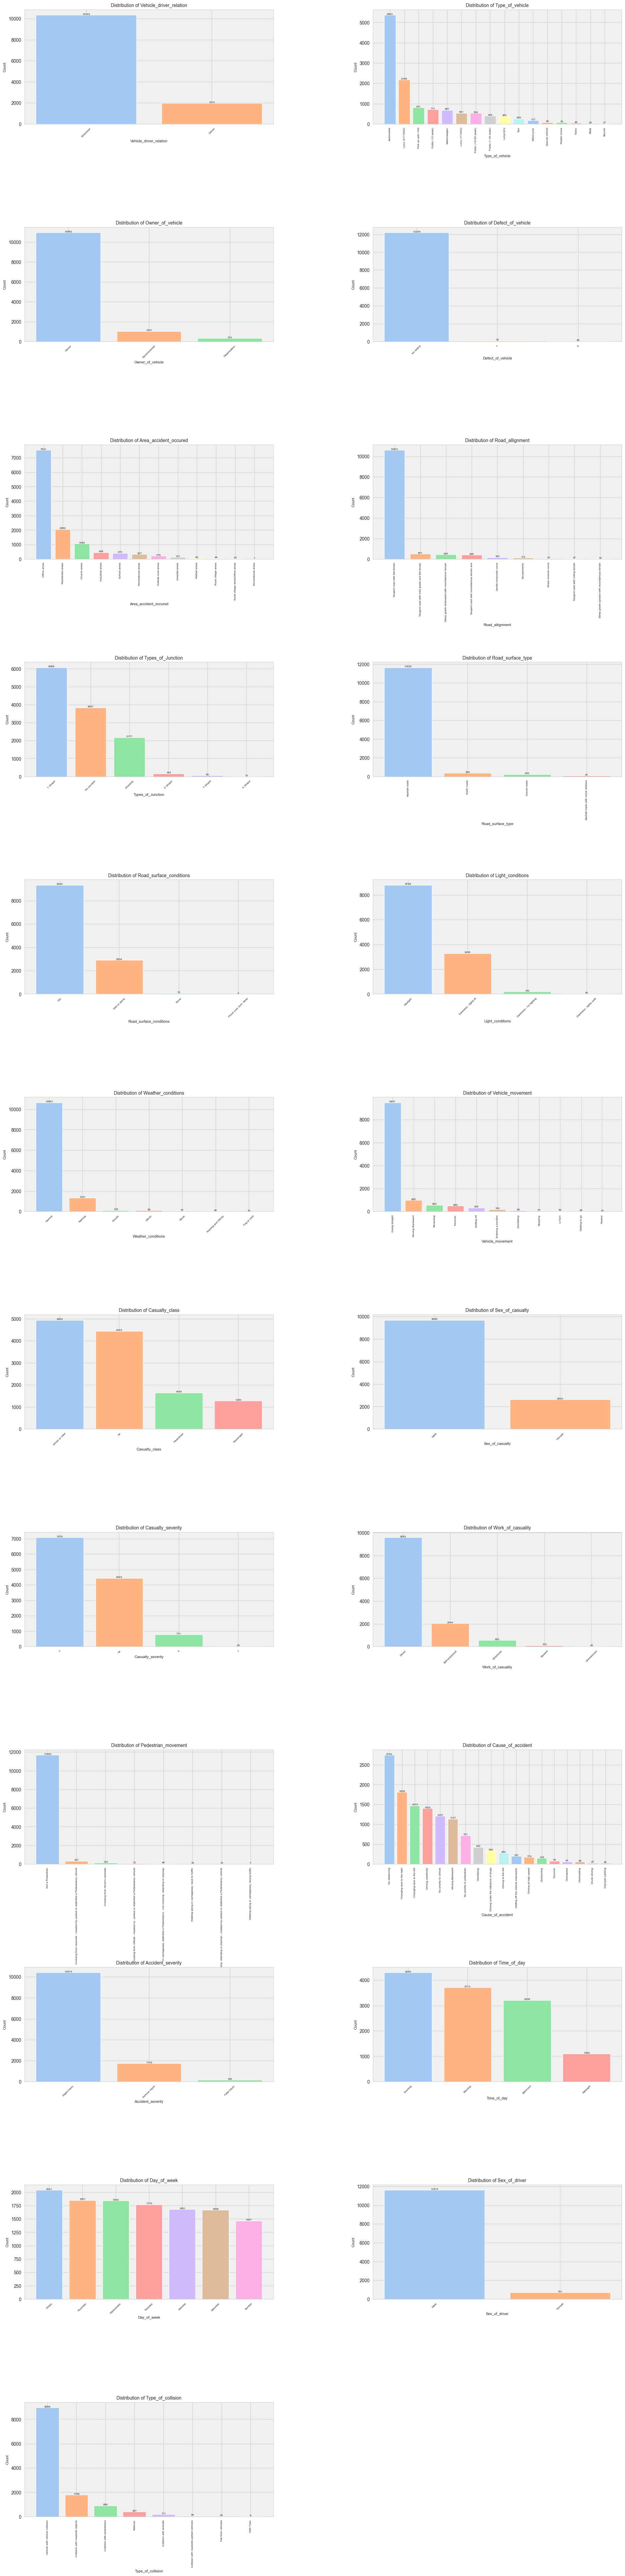

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Visualize the distribution of categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Calculate the number of rows needed to display all plots side by side
num_cols_per_row = 2
num_rows = (len(categorical_cols) + num_cols_per_row - 1) // num_cols_per_row

fig_width = 20
fig_height = num_rows * 7
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(fig_width, fig_height))

fitcol = ['Type_of_collision', 'Cause_of_accident', 'Pedestrian_movement', 'Vehicle_movement', 'Road_surface_type', 'Area_accident_occured', 'Road_allignment', 'Type_of_vehicle']

# Choose a light color palette
color_palette = sns.color_palette("pastel")

for i, col in enumerate(categorical_cols):
    row = i // num_cols_per_row
    col_idx = i % num_cols_per_row

    # Calculate value counts
    value_counts = df[col].value_counts().sort_values(ascending=False)

    # Create bar plot with different light colors
    bars = axes[row, col_idx].bar(value_counts.index, value_counts.values, color=color_palette[:len(value_counts)])

    axes[row, col_idx].set_title(f'Distribution of {col}', fontsize=10)
    axes[row, col_idx].set_xlabel(col, fontsize=8)
    axes[row, col_idx].set_ylabel('Count', fontsize=8)

    # Rotate x-axis labels for better readability
    if col in fitcol:
        axes[row, col_idx].tick_params(axis='x', rotation=90, labelsize=6)
    else:
        axes[row, col_idx].tick_params(axis='x', rotation=45, labelsize=6)

    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        axes[row, col_idx].text(bar.get_x() + bar.get_width()/2., height,
                                f'{height}', ha='center', va='bottom', fontsize=6)

    # Set background color to very light grey
    axes[row, col_idx].set_facecolor('#f0f0f0')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.9, wspace=0.4, top=0.95, bottom=0.05, left=0.05, right=0.95)

# Hide empty subplots if the number of categorical columns is not a multiple of num_cols_per_row
if isinstance(axes, np.ndarray):
    for j in range(len(categorical_cols), num_rows * num_cols_per_row):
        fig.delaxes(axes[j // num_cols_per_row, j % num_cols_per_row])

# Set overall figure background to white
fig.patch.set_facecolor('white')

plt.show()

In [51]:
# Selecting only numeric columns
numeric_df = df.select_dtypes(include='number')

correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                             Number_of_vehicles_involved  \
Number_of_vehicles_involved                     1.000000   
Number_of_casualties                            0.213427   
Driving_experience                             -0.007023   
Age_band_of_driver                             -0.015363   
Educational_level                              -0.004091   
Fitness_of_casuality                           -0.015239   
Lanes_or_Medians                               -0.002493   
Age_band_of_casualty                           -0.009864   
Service_year_of_vehicle                        -0.007895   

                             Number_of_casualties  Driving_experience  \
Number_of_vehicles_involved              0.213427           -0.007023   
Number_of_casualties                     1.000000           -0.017922   
Driving_experience                      -0.017922            1.000000   
Age_band_of_driver                      -0.011524            0.009489   
Educational_level                 

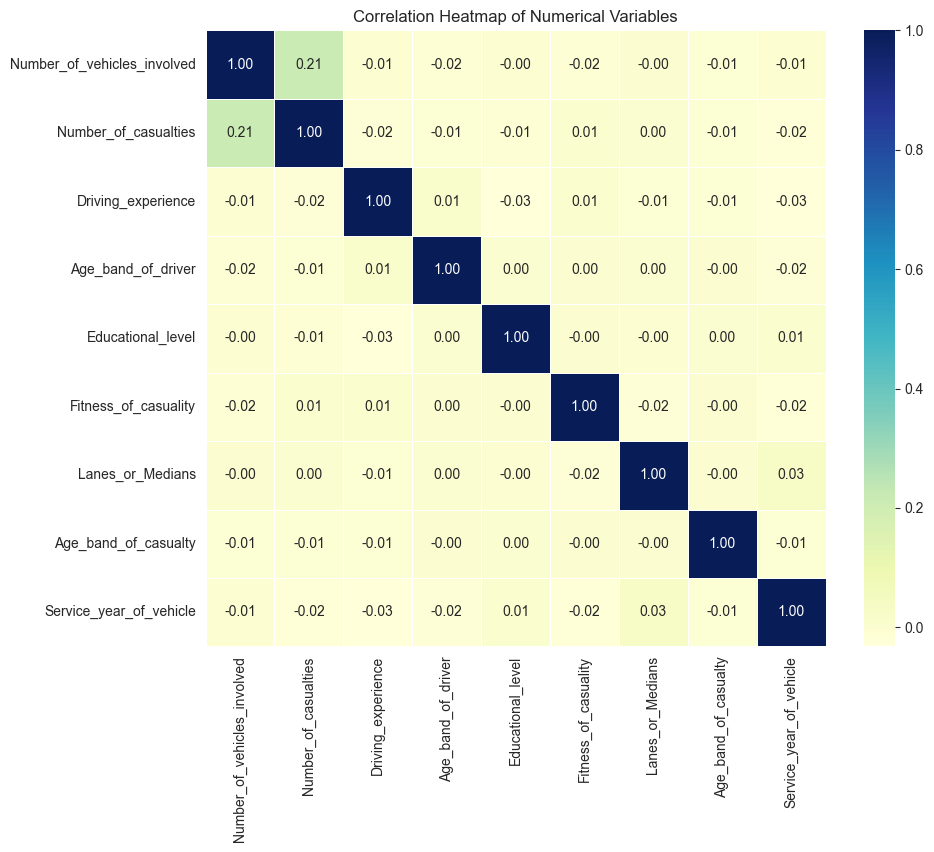

In [52]:
# Plot the heatmap of numerical correlations using the 'YlGnBu' palette
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


C:\Users\91939\AppData\Local\Temp\ipykernel_22444\1266694548.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=cramers_v_matrix.reset_index(), x='Cramers_V', y='index', palette='coolwarm')


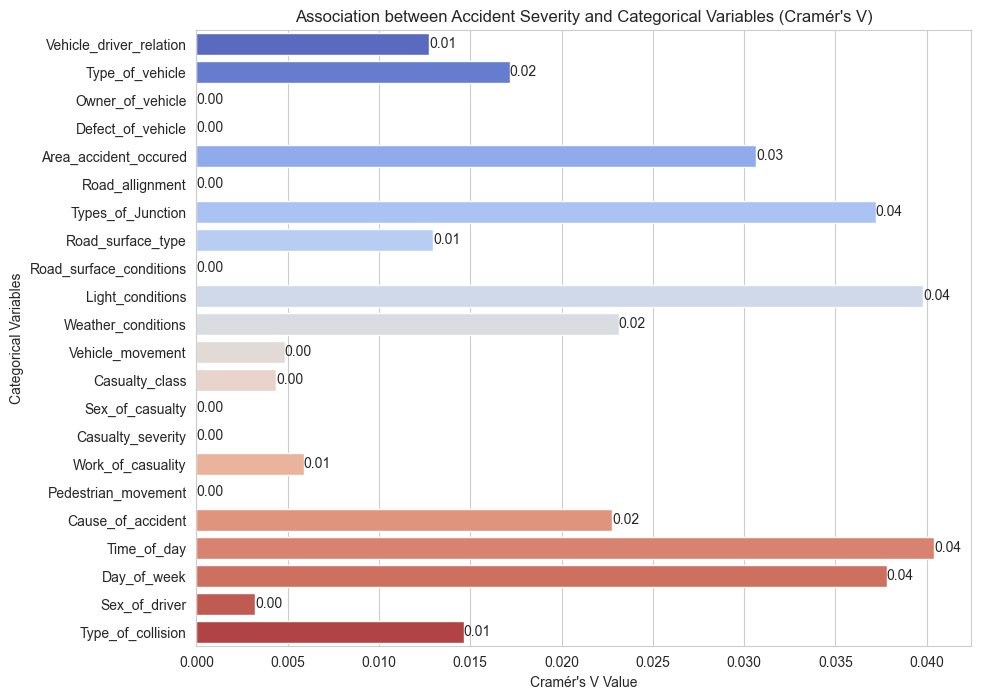

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V statistic
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Assuming 'df' is your dataframe and 'Accident_severity' is your target variable
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.drop('Accident_severity')  # Remove 'Accident_severity' from the list

cramers_v_matrix = pd.DataFrame(index=categorical_cols, columns=['Cramers_V'])

for col in categorical_cols:
    cramers_v_matrix.loc[col, 'Cramers_V'] = cramers_v(df[col], df['Accident_severity'])

# Plot the Cramér's V values
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=cramers_v_matrix.reset_index(), x='Cramers_V', y='index', palette='coolwarm')

# Add value labels to each bar
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f')

plt.title('Association between Accident Severity and Categorical Variables (Cramér\'s V)')
plt.xlabel('Cramér\'s V Value')
plt.ylabel('Categorical Variables')
plt.show()


In [54]:
# Replace 'categorical_variable' with each categorical variable name one by one

correlations = {}
for column in df.columns:
    if df[column].dtype == 'object':  # Select only categorical variables
        contingency_table = pd.crosstab(df['Accident_severity'], df[column])
        chi2, _, _, _ = chi2_contingency(contingency_table)
        n = contingency_table.values.sum()
        eta_squared = chi2 / (chi2 + n)
        correlations[column] = eta_squared

# Display the correlations
for variable, correlation in correlations.items():
    print(f"Correlation between 'Accident_severity' and '{variable}': {correlation}")


Correlation between 'Accident_severity' and 'Vehicle_driver_relation': 0.0003248993475462805
Correlation between 'Accident_severity' and 'Type_of_vehicle': 0.0030159770576369408
Correlation between 'Accident_severity' and 'Owner_of_vehicle': 0.0003218546823251273
Correlation between 'Accident_severity' and 'Defect_of_vehicle': 0.00021809485671359178
Correlation between 'Accident_severity' and 'Area_accident_occured': 0.003652631754087365
Correlation between 'Accident_severity' and 'Road_allignment': 0.0010506163663229263
Correlation between 'Accident_severity' and 'Types_of_Junction': 0.003566579233222255
Correlation between 'Accident_severity' and 'Road_surface_type': 0.000822412579664263
Correlation between 'Accident_severity' and 'Road_surface_conditions': 0.00046429048561255767
Correlation between 'Accident_severity' and 'Light_conditions': 0.0036424603396377655
Correlation between 'Accident_severity' and 'Weather_conditions': 0.0020403949728187076
Correlation between 'Accident_sev

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V statistic
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


In [56]:
# Select only categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Create a DataFrame to store the Cramér's V values
cramers_v_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

# Calculate Cramér's V for each pair of categorical variables
for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0  # Cramér's V of a variable with itself is 1
        else:
            cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Convert to numeric values for plotting
cramers_v_matrix = cramers_v_matrix.astype(float)


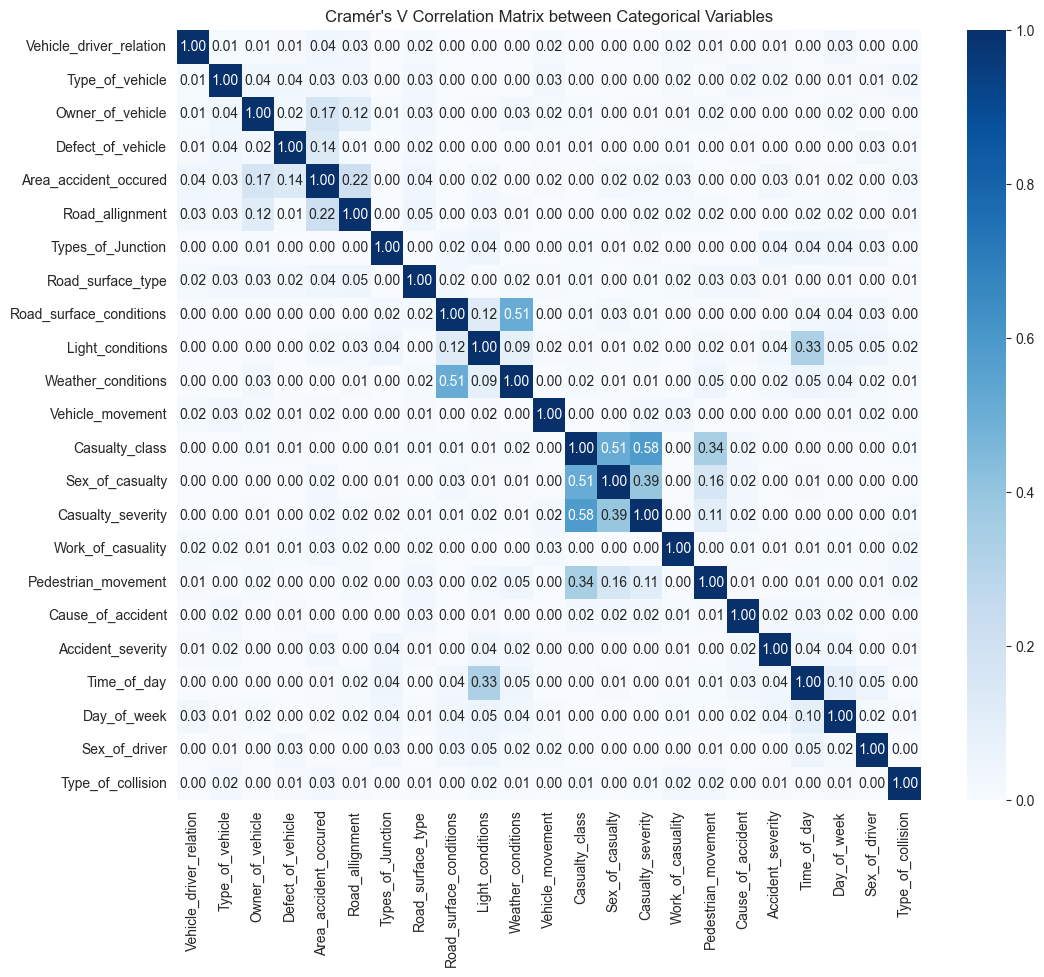

In [57]:
# Using the 'Blues' palette for an even lighter color scheme
plt.figure(figsize=(12, 10))
sns.heatmap(cramers_v_matrix, annot=True, cmap='Blues', fmt='.2f', cbar=True)
plt.title("Cramér's V Correlation Matrix between Categorical Variables")
plt.show()


In [58]:
from hyperopt import hp, fmin, tpe, rand, pyll, STATUS_OK, STATUS_FAIL, Trials, space_eval

from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import time
from xgboost import XGBClassifier

import shap

import math
import gc
import warnings

warnings.filterwarnings ('ignore')



In [59]:
cat = df.select_dtypes(include=['object']).columns
num = df.select_dtypes(include=['number']).columns

In [60]:
cat=cat.drop('Accident_severity')
df_num=df[num].copy()

In [61]:
df_cat = df[cat].copy()
# Perform one-hot encoding with drop_first=True for each categorical feature
for col in cat:
  if df_cat[col].dtype in ['object','category']:
    encoded_cols = pd.get_dummies(df_cat[col], prefix=col, drop_first=True)
    df_cat = pd.concat([df_cat, encoded_cols], axis=1)
    df_cat.drop(columns=[col], inplace=True)

print(df_cat.columns)

Index(['Vehicle_driver_relation_Owner', 'Type_of_vehicle_Bajaj',
       'Type_of_vehicle_Bicycle', 'Type_of_vehicle_Long lorry',
       'Type_of_vehicle_Lorry (11?40Q)', 'Type_of_vehicle_Lorry (41?100Q)',
       'Type_of_vehicle_Motorcycle', 'Type_of_vehicle_Pick up upto 10Q',
       'Type_of_vehicle_Public (12 seats)',
       'Type_of_vehicle_Public (13?45 seats)',
       ...
       'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 'Sex_of_driver_Male',
       'Type_of_collision_Collision with pedestrians',
       'Type_of_collision_Collision with roadside objects',
       'Type_of_collision_Collision with roadside-parked vehicles',
       'Type_of_collision_Fall from vehicles', 'Type_of_collision_Rollover',
       'Type_of_collision_Vehicle with vehicle collision',
       'Type_of_collision_With Train'],
      dtype='object', length=121)


In [62]:
df_encoded=pd.concat([df_num, df_cat],axis=1)

In [63]:
y=df['Accident_severity']
print(y.unique())

['Slight Injury' 'Serious Injury' 'Fatal injury']


In [64]:
y = y.replace({'Slight Injury': 0, 'Serious Injury': 1, 'Fatal injury': 2})
print(y.unique())
y=y.astype(int)

[0 1 2]


In [65]:
X_train,X_test,y_train,y_test=train_test_split(df_encoded,y,test_size=0.25,random_state=23,stratify=y)
print(f'X_train: {X_train.shape}, Y_train: {y_train.shape},X_test: {X_test.shape}, Y_test: {y_test.shape} ')

X_train: (9237, 130), Y_train: (9237,),X_test: (3079, 130), Y_test: (3079,) 


In [66]:
(y_test == 2).sum()+(y_test == 1).sum()+(y_test == 0).sum()
print((y_test == 2).sum())
print((y_train == 2).sum())

39
119


In [67]:
uniform = lambda x,b: (np.abs(x/b) <= 1) and 1/2 or 0
triangle = lambda x,b: (np.abs(x/b) <= 1) and  (1 - np.abs(x/b)) or 0
gaussian = lambda x,b: (1.0/np.sqrt(2*np.pi))* np.exp(-.5*(x/b)**2)
laplacian = lambda x,b: (1.0/(2*b))* np.exp(-np.abs(x/b))
epanechnikov = lambda x,b: (np.abs(x/b)<=1) and ((3/4)*(1-(x/b)**2)) or 0

def pattern_layer(inp,kernel,sigma):
  k_values=[]
  for i,p in enumerate(X_train.values):
    edis = np.linalg.norm(p-inp); #find eucliden distance
    k = kernel(edis,sigma); #pass values of euclidean dist and
    #smoothing parameter to kernel function
    k_values.append(k)
  return k_values


def summation_layer(k_values, Y_train, class_counts):
    summed = [0, 0, 0]
    for i, c in enumerate(class_counts):
        val = (Y_train == class_counts.index[i]).values
        k_values = np.array(k_values)
        summed[i] = np.sum(k_values[val])
    avg_sum = list(summed / Y_train.value_counts())
    return avg_sum
def output_layer(avg_sum, class_counts):
    maxv = max(avg_sum)
    max_index = avg_sum.index(maxv)
    label = class_counts.index[max_index]
    return label
## Bringing all layers together under PNN function

def pnn(X_train,Y_train,X_test,kernel,sigma):
  # Initialising variables
  class_counts = Y_train.value_counts()
  labels=[]
  #Passing each sample observation
  for s in X_test.values:
    k_values = pattern_layer(s,kernel,sigma)
    avg_sum = summation_layer(k_values,Y_train,class_counts)
    label = output_layer(avg_sum,class_counts)
    labels.append(label)
  print('Labels Generated for bandwidth:',sigma)
  return labels


In [68]:
X_train,X_test,Y_train,Y_test=train_test_split(df_encoded,y,test_size=0.25,random_state=23,stratify=y)

In [69]:
#Candidate Kernels
kernels = ['Gaussian','Triangular','Epanechnikov']
sigmas = [0.05,0.5,0.8,1,1.2]

results = pd.DataFrame(columns=['Kernel','Smoothing Param','Accuracy','F1-Score'])
for k in kernels:
    if k == 'Gaussian':
        k_func = gaussian
    elif k == 'Triangular':
        k_func = triangle
    else:
        k_func = epanechnikov

    for b in sigmas:
        pred = pnn(X_train, Y_train, X_test, k_func, b)
        accuracy = accuracy_score(Y_test.values, pred)  # Use Y_test directly
        f1 = f1_score(Y_test.values, pred, average='weighted')  # Use Y_test directly
        results.loc[len(results.index)] = [k, b, accuracy, f1]


Labels Generated for bandwidth: 0.05
Labels Generated for bandwidth: 0.5
Labels Generated for bandwidth: 0.8
Labels Generated for bandwidth: 1
Labels Generated for bandwidth: 1.2
Labels Generated for bandwidth: 0.05
Labels Generated for bandwidth: 0.5
Labels Generated for bandwidth: 0.8
Labels Generated for bandwidth: 1
Labels Generated for bandwidth: 1.2
Labels Generated for bandwidth: 0.05
Labels Generated for bandwidth: 0.5
Labels Generated for bandwidth: 0.8
Labels Generated for bandwidth: 1
Labels Generated for bandwidth: 1.2


In [70]:
print(results)

          Kernel  Smoothing Param  Accuracy  F1-Score
0       Gaussian             0.05  0.843780  0.775278
1       Gaussian             0.50  0.670348  0.704263
2       Gaussian             0.80  0.552127  0.626738
3       Gaussian             1.00  0.540760  0.621352
4       Gaussian             1.20  0.576811  0.650462
5     Triangular             0.05  0.845729  0.775041
6     Triangular             0.50  0.845729  0.775041
7     Triangular             0.80  0.845729  0.775041
8     Triangular             1.00  0.845729  0.775041
9     Triangular             1.20  0.845729  0.775041
10  Epanechnikov             0.05  0.845729  0.775041
11  Epanechnikov             0.50  0.845729  0.775041
12  Epanechnikov             0.80  0.845729  0.775041
13  Epanechnikov             1.00  0.845729  0.775041
14  Epanechnikov             1.20  0.845729  0.775041


plt.rcParams['figure.figsize'] = [10, 5]
plt.subplot(121)
sns.lineplot(y=results['Accuracy'],x=results['Smoothing Param'],hue=results['Kernel']);
plt.title('Accuracy for Different Kernels',loc='right');

plt.subplot(122)
sns.lineplot(y=results['F1-Score'],x=results['Smoothing Param'],hue=results['Kernel']);
plt.title('F1-Score for Different Kernels',loc='left');

plt.show()

In [ ]:
 # Epanechnikov             0.05  0.845729  0.775041

In [72]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
model = XGBClassifier(n_estimators=500, random_state=23)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from xgboost import XGBClassifier

np.random.seed(42)
random.seed(42)

# Define the search space for hyperparameters
space = {
    'n_estimators': hp.choice('n_estimators', [100, 300, 500]),
    'max_depth': hp.choice('max_depth', [3, 5, 7]),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'subsample': hp.uniform('subsample', 0.7, 0.9),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.7, 0.9),
    'gamma': hp.uniform('gamma', 0, 0.3),
    'reg_alpha': hp.uniform('reg_alpha', 0, 0.3),
    'reg_lambda': hp.uniform('reg_lambda', 0, 0.3),
    'min_child_weight': hp.choice('min_child_weight', [1, 3, 5]),
    'scale_pos_weight': hp.choice('scale_pos_weight', [1, 3, 5])
}

# Define objective function for optimization
def objective(params):
    model = XGBClassifier(**params, random_state=23)
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=23)
    score = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy').mean()

    return {'loss': -score, 'status': STATUS_OK}

# Initialize Trials object
trials = Trials()

# Run Hyperopt optimization
best = fmin(objective, space, algo=tpe.suggest, max_evals=50, trials=trials)


# Get the best hyperparameters
best_params = space_eval(space, best)

print("Best Hyperparameters:", best_params)


100%|██████████| 50/50 [35:08<00:00, 42.17s/trial, best loss: -0.8487604200497998]   
Best Hyperparameters: {'colsample_bytree': 0.7324377036918175, 'gamma': 0.02795040305640011, 'learning_rate': 0.06358952769791298, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 100, 'reg_alpha': 0.09997457212933138, 'reg_lambda': 0.01524176000841969, 'scale_pos_weight': 3, 'subsample': 0.7736162163633633}


In [73]:
best_model = XGBClassifier(**best_params, random_state=23)

# Fit the model to the training data
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("TEST Accuracy:", accuracy)

TEST Accuracy: 0.8473530367002273


In [74]:
print(f"F1 score is {f1_score(y_test,y_pred,average='macro')}")

#F1 score is very less due to the class imbalance

F1 score is 0.3570720397487382


In [75]:
pred_train = best_model.predict(X_train)
print('TRAIN Accuracy: ', accuracy_score(y_train, pred_train),'\n')
print('Classification Report:')
print(classification_report(y_test,y_pred))

TRAIN Accuracy:  0.8657572805023276 

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2604
           1       0.52      0.03      0.06       436
           2       1.00      0.05      0.10        39

    accuracy                           0.85      3079
   macro avg       0.79      0.36      0.36      3079
weighted avg       0.81      0.85      0.78      3079



In [76]:
#USING SHAP
explainer=shap.TreeExplainer(model=best_model,
                             data=None,
                             model_output='raw',
                             feature_perturbation='tree_path_dependant')

In [77]:
shap_values=explainer.shap_values(X_test)
#example, for 1 instance
shap_values_eg=explainer.shap_values(X_test[1:2])
print(shap_values_eg.shape)
print(shap_values_eg)

(1, 130, 3)
[[[ 2.50446916e-01 -1.97651118e-01 -4.14343923e-02]
  [ 3.66824009e-02  1.00158835e-02 -1.21004425e-01]
  [ 1.63036879e-04  5.38311107e-03 -3.55627551e-03]
  [ 1.13729276e-02 -3.22685130e-02 -1.66091649e-03]
  [-3.10078338e-02 -2.20345054e-02  9.20576393e-04]
  [ 0.00000000e+00  3.76760872e-05  0.00000000e+00]
  [-1.80599689e-02  1.81333739e-02  6.61835894e-02]
  [-4.62571625e-03  1.00562780e-03  2.87460093e-03]
  [-5.31570055e-03 -5.33821294e-03 -2.27623172e-02]
  [-3.49573820e-04 -6.23025745e-03 -1.79127362e-02]
  [-3.02333239e-04  8.44949827e-05  0.00000000e+00]
  [-1.12771704e-04  0.00000000e+00  0.00000000e+00]
  [ 1.55277224e-03 -2.87908060e-03 -2.83038680e-04]
  [ 1.54824730e-03 -7.67687801e-03 -1.19621924e-04]
  [-6.65296428e-03  9.40669328e-03 -7.43078301e-03]
  [ 9.86690866e-04 -2.57910928e-04 -1.67718055e-04]
  [ 1.19959600e-02 -1.14758918e-02 -8.02958291e-03]
  [-1.55544817e-03 -5.02788345e-04 -1.37760621e-02]
  [ 4.31088964e-03 -2.51741218e-03 -2.74420064e-03]


In [78]:
print(f'shape of test dataset: {X_test.shape}')
print(f'Type of shap_values: {type (shap_values)}. Length of the list: {len(shap_values)}')
print (f'Shape of shap_values: {np.array (shap_values).shape}')

shape of test dataset: (3079, 130)
Type of shap_values: <class 'numpy.ndarray'>. Length of the list: 3079
Shape of shap_values: (3079, 130, 3)


In [79]:
# Get the one-hot encoded columns from the original DataFrame
one_hot_encoded_columns = df_encoded.select_dtypes(include='bool').columns
print(one_hot_encoded_columns)

Index(['Vehicle_driver_relation_Owner', 'Type_of_vehicle_Bajaj',
       'Type_of_vehicle_Bicycle', 'Type_of_vehicle_Long lorry',
       'Type_of_vehicle_Lorry (11?40Q)', 'Type_of_vehicle_Lorry (41?100Q)',
       'Type_of_vehicle_Motorcycle', 'Type_of_vehicle_Pick up upto 10Q',
       'Type_of_vehicle_Public (12 seats)',
       'Type_of_vehicle_Public (13?45 seats)',
       ...
       'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 'Sex_of_driver_Male',
       'Type_of_collision_Collision with pedestrians',
       'Type_of_collision_Collision with roadside objects',
       'Type_of_collision_Collision with roadside-parked vehicles',
       'Type_of_collision_Fall from vehicles', 'Type_of_collision_Rollover',
       'Type_of_collision_Vehicle with vehicle collision',
       'Type_of_collision_With Train'],
      dtype='object', length=121)


In [80]:
# Initialize dictionary to store sum of SHAP values for each one-hot encoded feature
sum_shap_values_dict = {}

# Loop through each one-hot encoded feature group
for feature_name in one_hot_encoded_columns:
    if "_" in feature_name:  # since one-hot encoded features have "_" in their names
        if  feature_name.startswith('Type_of_vehicle') :
          prefix='Type_of_vehicle'
        elif feature_name.startswith('Type_of_collision'):
          prefix='Type_of_collision'
        elif feature_name.startswith('Sex_of_casualty'):
          prefix='Sex_of_casualty'
        elif feature_name.startswith('Road_surface_type'):
          prefix='Road_surface_type'
        elif feature_name.startswith('Road_surface_conditions'):
          prefix='Road_surface_conditions'
        else:
          prefix = feature_name.split("_")[0]+"_"+feature_name.split("_")[1]
        sum_shap_values_dict[prefix] = np.sum(np.abs(shap_values[:, df_encoded.columns.str.startswith(prefix)]), axis=1)

# Print the sum of SHAP values for each one-hot encoded feature
for feature_name, sum_shap_values in sum_shap_values_dict.items():
    print(f"Sum of SHAP values for {feature_name}: {np.mean(sum_shap_values)}")

Sum of SHAP values for Vehicle_driver: 0.012459206394851208
Sum of SHAP values for Type_of_vehicle: 0.06604385375976562
Sum of SHAP values for Owner_of: 0.00872047245502472
Sum of SHAP values for Defect_of: 0.001378730870783329
Sum of SHAP values for Area_accident: 0.04350380226969719
Sum of SHAP values for Road_allignment: 0.011673257686197758
Sum of SHAP values for Types_of: 0.06895945966243744
Sum of SHAP values for Road_surface_type: 0.006912393495440483
Sum of SHAP values for Road_surface_conditions: 0.012632651254534721
Sum of SHAP values for Light_conditions: 0.031795572489500046
Sum of SHAP values for Weather_conditions: 0.02521432563662529
Sum of SHAP values for Vehicle_movement: 0.025642892345786095
Sum of SHAP values for Casualty_class: 0.0151360547170043
Sum of SHAP values for Sex_of_casualty: 0.004729839041829109
Sum of SHAP values for Casualty_severity: 0.023622959852218628
Sum of SHAP values for Work_of: 0.016476696357131004
Sum of SHAP values for Pedestrian_movement: 0.

In [81]:
for col in num:
    col_index = df_encoded.columns.get_loc(col)  # Get the index of the column
    sum_shap_values_dict[col] = np.sum(np.abs(shap_values[:, col_index]), axis=1)

# Print the sum of SHAP values for each numerical feature
i=0
for feature_name, sum_shap_values in sum_shap_values_dict.items():
  i+=1
  print(f"{i},Sum of SHAP values for {feature_name}: {np.mean(sum_shap_values)}")

1,Sum of SHAP values for Vehicle_driver: 0.012459206394851208
2,Sum of SHAP values for Type_of_vehicle: 0.06604385375976562
3,Sum of SHAP values for Owner_of: 0.00872047245502472
4,Sum of SHAP values for Defect_of: 0.001378730870783329
5,Sum of SHAP values for Area_accident: 0.04350380226969719
6,Sum of SHAP values for Road_allignment: 0.011673257686197758
7,Sum of SHAP values for Types_of: 0.06895945966243744
8,Sum of SHAP values for Road_surface_type: 0.006912393495440483
9,Sum of SHAP values for Road_surface_conditions: 0.012632651254534721
10,Sum of SHAP values for Light_conditions: 0.031795572489500046
11,Sum of SHAP values for Weather_conditions: 0.02521432563662529
12,Sum of SHAP values for Vehicle_movement: 0.025642892345786095
13,Sum of SHAP values for Casualty_class: 0.0151360547170043
14,Sum of SHAP values for Sex_of_casualty: 0.004729839041829109
15,Sum of SHAP values for Casualty_severity: 0.023622959852218628
16,Sum of SHAP values for Work_of: 0.016476696357131004
17,Sum 

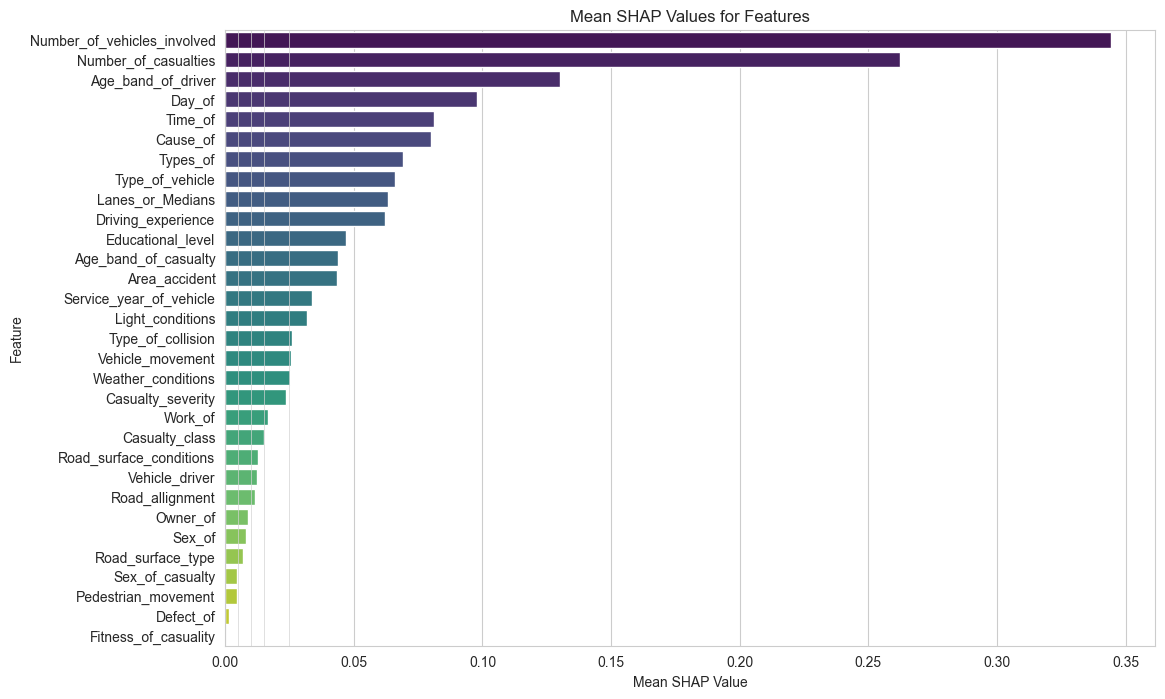

In [82]:
# Compute the mean SHAP value for each feature
mean_shap_values = {feature_name: np.mean(sum_shap_values) for feature_name, sum_shap_values in sum_shap_values_dict.items()}

# Convert the mean SHAP values dictionary into a DataFrame
mean_shap_df = pd.DataFrame.from_dict(mean_shap_values, orient='index', columns=['Mean SHAP Value'])

# Sort the DataFrame by mean SHAP value
mean_shap_df = mean_shap_df.sort_values(by='Mean SHAP Value', ascending=False)

# Plot the mean SHAP values
plt.figure(figsize=(12, 8))
sns.barplot(x=mean_shap_df['Mean SHAP Value'], y=mean_shap_df.index, palette='viridis')
plt.axvline(x=0.025, color='lightgray', linestyle='-', linewidth=0.5)  #vertical line at x=0.025
plt.axvline(x=0.015, color='lightgray', linestyle='-', linewidth=0.5)  #vertical line at x=0.015
plt.axvline(x=0.01, color='lightgray', linestyle='-', linewidth=0.5)  #vertical line at x=0.01
plt.axvline(x=0.005, color='lightgray', linestyle='-', linewidth=0.5)  #vertical line at x=0.005
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Mean SHAP Values for Features')
plt.show()


In [83]:
print(mean_shap_values)

{'Vehicle_driver': 0.012459206, 'Type_of_vehicle': 0.066043854, 'Owner_of': 0.008720472, 'Defect_of': 0.0013787309, 'Area_accident': 0.043503802, 'Road_allignment': 0.011673258, 'Types_of': 0.06895946, 'Road_surface_type': 0.0069123935, 'Road_surface_conditions': 0.012632651, 'Light_conditions': 0.031795572, 'Weather_conditions': 0.025214326, 'Vehicle_movement': 0.025642892, 'Casualty_class': 0.015136055, 'Sex_of_casualty': 0.004729839, 'Casualty_severity': 0.02362296, 'Work_of': 0.016476696, 'Pedestrian_movement': 0.004655553, 'Cause_of': 0.0800598, 'Time_of': 0.08134932, 'Day_of': 0.09790904, 'Sex_of': 0.008295868, 'Type_of_collision': 0.02615239, 'Number_of_vehicles_involved': 0.34425247, 'Number_of_casualties': 0.2621025, 'Driving_experience': 0.062120613, 'Age_band_of_driver': 0.13004412, 'Educational_level': 0.047144126, 'Fitness_of_casuality': 6.0604325e-05, 'Lanes_or_Medians': 0.06334779, 'Age_band_of_casualty': 0.04372947, 'Service_year_of_vehicle': 0.033578865}


In [84]:
# 1. Find the maximum SHAP value
max_shap_value = np.max(np.abs(shap_values))

# 2. Calculate the average prediction
average_prediction = np.mean(best_model.predict(X_test))  # Assuming model is your trained XGBoost model

print("Maximum SHAP value:", max_shap_value)
print("Average prediction:", average_prediction)

std_prediction = np.std(best_model.predict(X_test))

print(f"Standard deviation of predictions: {std_prediction}")

Maximum SHAP value: 2.2179222
Average prediction: 0.009418642416368951
Standard deviation of predictions: 0.10309730686741768


In [85]:
shap_values_dict = {}
final_dict={}

class_names=['Slight Injury','Severe Injury','Fatal Injury']
# Loop through each class
for class_name in class_names:
    # Initialize dictionaries for positive and negative SHAP values for the current class
    shap_values_dict[class_name] = {}
    final_dict[class_name] = {}

    # Loop through each feature
    for feature_name in one_hot_encoded_columns:
      if "_" in feature_name:  # since one-hot encoded features have "_" in their names
        if  feature_name.startswith('Type_of_vehicle') :
          prefix='Type_of_vehicle'
        elif feature_name.startswith('Type_of_collision'):
          prefix='Type_of_collision'
        elif feature_name.startswith('Sex_of_casualty'):
          prefix='Sex_of_casualty'
        elif feature_name.startswith('Road_surface_type'):
          prefix='Road_surface_type'
        elif feature_name.startswith('Road_surface_conditions'):
          prefix='Road_surface_conditions'
        else:
          prefix = feature_name.split("_")[0]+"_"+feature_name.split("_")[1]

        #shap_values_dict[class_name][prefix] = np.sum(np.abs(shap_values[i, df_encoded.columns.str.startswith(prefix)]), axis=1) for y_pred[i]==class_name
        #shap_values_dict[class_name][prefix] = np.sum(np.abs(shap_values[y_pred == class_name][:, df_encoded.columns.str.startswith(prefix)]), axis=1)
        class_index = class_names.index(class_name)
        shap_values_dict[class_name][prefix] = np.sum(np.abs(shap_values[y_pred == class_index][:, :, class_index][:, df_encoded.columns.str.startswith(prefix)]), axis=1)


# Print the sum of SHAP values for each class and each one-hot encoded feature
for class_name, feature_dict in shap_values_dict.items():
    print(f"Class: {class_name}")
    for feature_name, sum_shap_values in feature_dict.items():
        print(f"  SHAP values for {feature_name}: {np.mean(sum_shap_values)}")
        final_dict[class_name][feature_name]= np.mean(sum_shap_values)





Class: Slight Injury
  SHAP values for Vehicle_driver: 0.006418471224606037
  SHAP values for Type_of_vehicle: 0.05738701671361923
  SHAP values for Owner_of: 0.009554063901305199
  SHAP values for Defect_of: 0.001048545353114605
  SHAP values for Area_accident: 0.040143027901649475
  SHAP values for Road_allignment: 0.011910369619727135
  SHAP values for Types_of: 0.08345658332109451
  SHAP values for Road_surface_type: 0.008086993359029293
  SHAP values for Road_surface_conditions: 0.009999283589422703
  SHAP values for Light_conditions: 0.02078290656208992
  SHAP values for Weather_conditions: 0.028761964291334152
  SHAP values for Vehicle_movement: 0.014680766500532627
  SHAP values for Casualty_class: 0.011262485757470131
  SHAP values for Sex_of_casualty: 0.006757482420653105
  SHAP values for Casualty_severity: 0.027796896174550056
  SHAP values for Work_of: 0.010160719975829124
  SHAP values for Pedestrian_movement: 0.005291992332786322
  SHAP values for Cause_of: 0.07901361584

In [86]:
print(final_dict)

{'Slight Injury': {'Vehicle_driver': 0.006418471, 'Type_of_vehicle': 0.057387017, 'Owner_of': 0.009554064, 'Defect_of': 0.0010485454, 'Area_accident': 0.040143028, 'Road_allignment': 0.01191037, 'Types_of': 0.08345658, 'Road_surface_type': 0.008086993, 'Road_surface_conditions': 0.009999284, 'Light_conditions': 0.020782907, 'Weather_conditions': 0.028761964, 'Vehicle_movement': 0.0146807665, 'Casualty_class': 0.011262486, 'Sex_of_casualty': 0.0067574824, 'Casualty_severity': 0.027796896, 'Work_of': 0.01016072, 'Pedestrian_movement': 0.0052919923, 'Cause_of': 0.079013616, 'Time_of': 0.0516568, 'Day_of': 0.03894031, 'Sex_of': 0.010226746, 'Type_of_collision': 0.02567968}, 'Severe Injury': {'Vehicle_driver': 0.005529195, 'Type_of_vehicle': 0.0631888, 'Owner_of': 0.012080066, 'Defect_of': 0.0023031838, 'Area_accident': 0.057058573, 'Road_allignment': 0.031125339, 'Types_of': 0.091564864, 'Road_surface_type': 0.0061395075, 'Road_surface_conditions': 0.017910317, 'Light_conditions': 0.204717

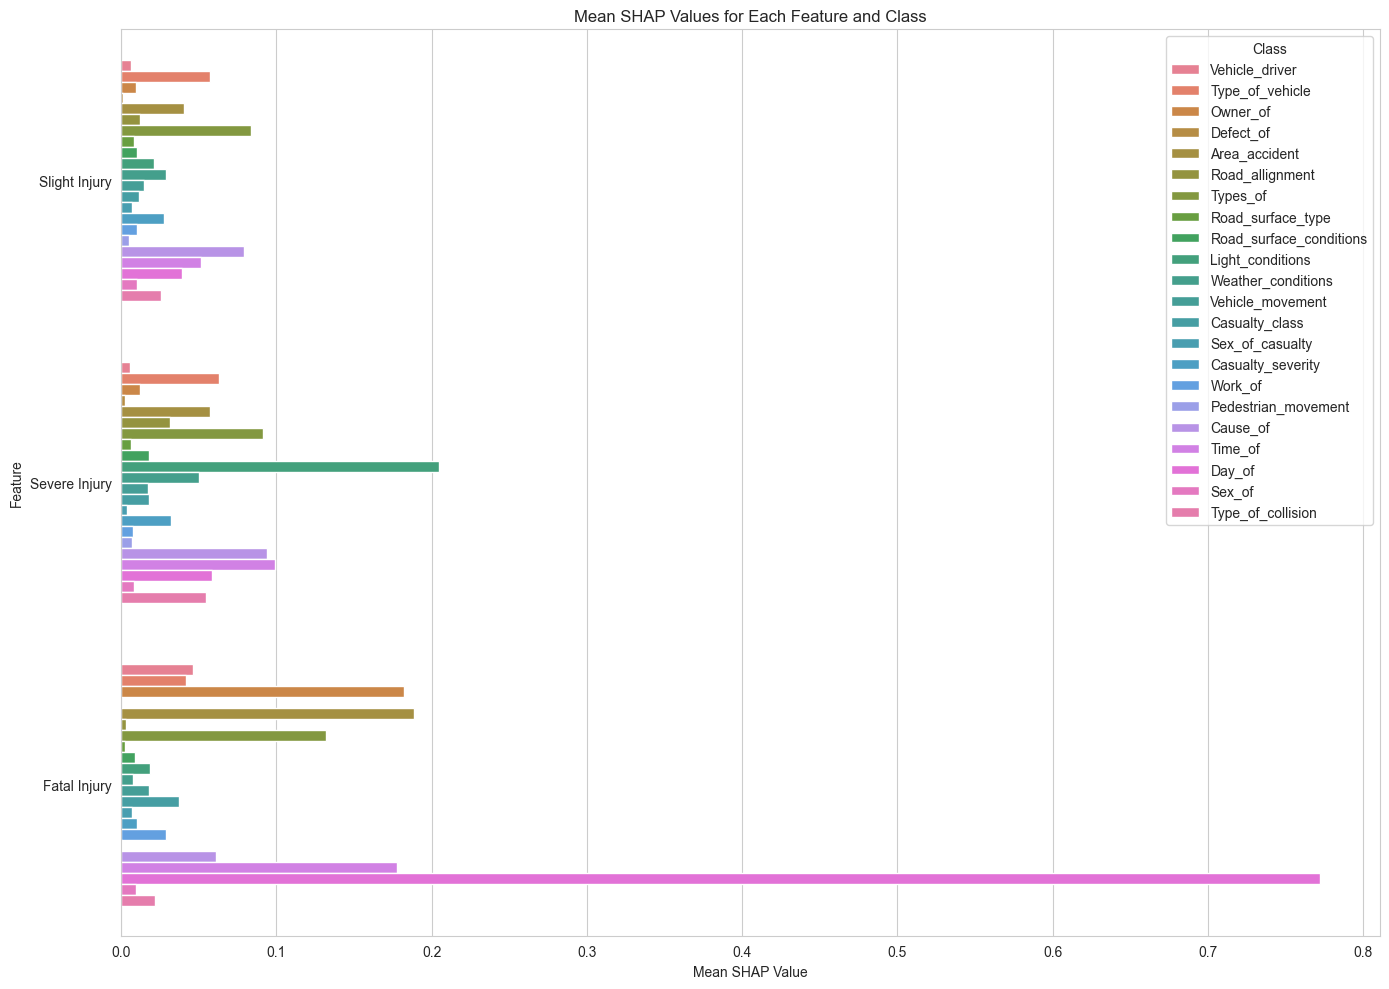

In [87]:
# Convert final_dict to DataFrame for easier plotting
final_df = pd.DataFrame.from_dict(final_dict)

# Transpose the DataFrame to have features as rows and classes as columns
final_df_transposed = final_df.T.reset_index()

# Melt the DataFrame to have one row for each feature-class combination
final_df_melted = pd.melt(final_df_transposed, id_vars=['index'], var_name='Class', value_name='Mean SHAP Value')

# Plotting
plt.figure(figsize=(14, 10))
sns.barplot(data=final_df_melted, y='index', x='Mean SHAP Value', hue='Class')
plt.ylabel('Feature')
plt.xlabel('Mean SHAP Value')
plt.title('Mean SHAP Values for Each Feature and Class')
plt.tight_layout()
plt.show()

In [88]:
# Threshold for mean SHAP value
threshold = 0.05

# Filter feature names where the mean SHAP value exceeds the threshold
selected_features = mean_shap_df.index[mean_shap_df['Mean SHAP Value'] > threshold]

print("Features with mean SHAP value > 0.025:")
print(len(selected_features))

final_features=list(set(list(selected_features))-set(['Service_year_of_vehicle', 'Area_accident','Work_of']))+['Accident_severity']
print(len(final_features))
final_features

Features with mean SHAP value > 0.025:
10
11


['Cause_of',
 'Driving_experience',
 'Number_of_vehicles_involved',
 'Number_of_casualties',
 'Day_of',
 'Age_band_of_driver',
 'Lanes_or_Medians',
 'Types_of',
 'Type_of_vehicle',
 'Time_of',
 'Accident_severity']

In [89]:
df_encoded_y= pd.concat([df_encoded, y], axis=1)

In [90]:
filtered_columns = [col for col in df_encoded_y.columns if any(col.startswith(p) for p in final_features)]
df_postshap = df_encoded_y[filtered_columns]

In [91]:
df_postshap_X=df_postshap.drop(columns=['Accident_severity'])

In [92]:

column_names = df_postshap_X.columns.tolist()
print(column_names)


['Number_of_vehicles_involved', 'Number_of_casualties', 'Driving_experience', 'Age_band_of_driver', 'Lanes_or_Medians', 'Type_of_vehicle_Bajaj', 'Type_of_vehicle_Bicycle', 'Type_of_vehicle_Long lorry', 'Type_of_vehicle_Lorry (11?40Q)', 'Type_of_vehicle_Lorry (41?100Q)', 'Type_of_vehicle_Motorcycle', 'Type_of_vehicle_Pick up upto 10Q', 'Type_of_vehicle_Public (12 seats)', 'Type_of_vehicle_Public (13?45 seats)', 'Type_of_vehicle_Public (> 45 seats)', 'Type_of_vehicle_Ridden horse', 'Type_of_vehicle_Special vehicle', 'Type_of_vehicle_Stationwagen', 'Type_of_vehicle_Taxi', 'Type_of_vehicle_Turbo', 'Types_of_Junction_No junction', 'Types_of_Junction_O Shape', 'Types_of_Junction_T Shape', 'Types_of_Junction_X Shape', 'Types_of_Junction_Y Shape', 'Cause_of_accident_Changing lane to the right', 'Cause_of_accident_Driving at high speed', 'Cause_of_accident_Driving carelessly', 'Cause_of_accident_Driving to the left', 'Cause_of_accident_Driving under the influence of drugs', 'Cause_of_accident_D

In [93]:
X_train,X_test,y_train,y_test=train_test_split(df_postshap_X,y,test_size=0.25,random_state=23,stratify=y)
print(f'X_train: {X_train.shape}, Y_train: {y_train.shape},X_test: {X_test.shape}, Y_test: {y_test.shape} ')

from sklearn.model_selection import cross_val_score, StratifiedKFold
postshap_model = XGBClassifier(n_estimators=500, random_state=23)
postshap_model.fit(X_train, y_train)
y_pred = postshap_model.predict(X_test)
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from xgboost import XGBClassifier

np.random.seed(42)
random.seed(42)

# Define the search space for hyperparameters
space = {
    'n_estimators': hp.choice('n_estimators', [100, 300, 500]),
    'max_depth': hp.choice('max_depth', [3, 5, 7]),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'subsample': hp.uniform('subsample', 0.7, 0.9),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.7, 0.9),
    'gamma': hp.uniform('gamma', 0, 0.3),
    'reg_alpha': hp.uniform('reg_alpha', 0, 0.3),
    'reg_lambda': hp.uniform('reg_lambda', 0, 0.3),
    'min_child_weight': hp.choice('min_child_weight', [1, 3, 5]),
    'scale_pos_weight': hp.choice('scale_pos_weight', [1, 3, 5])
}

# Define objective function for optimization
def objective(params):
    postshap_model = XGBClassifier(**params, random_state=23)
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=23)
    score = cross_val_score(postshap_model, X_train, y_train, cv=cv, scoring='accuracy').mean()

    return {'loss': -score, 'status': STATUS_OK}

# Initialize Trials object
trials = Trials()

# Run Hyperopt optimization
best = fmin(objective, space, algo=tpe.suggest, max_evals=50, trials=trials)


# Get the best hyperparameters
best_params = space_eval(space, best)

print("Best Hyperparameters:", best_params)



X_train: (9237, 51), Y_train: (9237,),X_test: (3079, 51), Y_test: (3079,) 
100%|██████████| 50/50 [01:59<00:00,  2.39s/trial, best loss: -0.8493017213380968]
Best Hyperparameters: {'colsample_bytree': 0.8730115700456591, 'gamma': 0.023591039249472985, 'learning_rate': 0.06303649488147435, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0.06573853486928721, 'reg_lambda': 0.10312333660493314, 'scale_pos_weight': 3, 'subsample': 0.898400417781875}


In [94]:
best_postshap_model=XGBClassifier(*best_params,random_state=23)

# Fit the model to the training data
best_postshap_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_postshap_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("TEST Accuracy:", accuracy)

TEST Accuracy: 0.8437804481974667


In [95]:
pred_train = best_postshap_model.predict(X_train)
print('TRAIN Accuracy: ', accuracy_score(y_train, pred_train),'\n')
print('Classification Report:')
print(classification_report(y_test,y_pred))

TRAIN Accuracy:  0.8997510014073834 

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      2604
           1       0.41      0.08      0.13       436
           2       0.88      0.18      0.30        39

    accuracy                           0.84      3079
   macro avg       0.71      0.41      0.45      3079
weighted avg       0.79      0.84      0.80      3079



In [96]:
df_postshap.to_csv('df_postshap.csv', index=False)

In [97]:
X_train,X_test,y_train,y_test=train_test_split(df_postshap,y,test_size=0.25,random_state=23,stratify=y)
print(f'X_train: {X_train.shape}, Y_train: {y_train.shape},X_test: {X_test.shape}, Y_test: {y_test.shape} ')

X_train: (9237, 52), Y_train: (9237,),X_test: (3079, 52), Y_test: (3079,) 


Labels Generated for bandwidth: 0.05
Labels Generated for bandwidth: 0.5
Labels Generated for bandwidth: 0.8
Labels Generated for bandwidth: 1
Labels Generated for bandwidth: 0.05
Labels Generated for bandwidth: 0.5
Labels Generated for bandwidth: 0.8
Labels Generated for bandwidth: 1
Labels Generated for bandwidth: 0.05
Labels Generated for bandwidth: 0.5
Labels Generated for bandwidth: 0.8
Labels Generated for bandwidth: 1
          Kernel  Smoothing Param  Accuracy  F1-Score
0       Gaussian             0.05  0.902566  0.895341
1       Gaussian             0.50  0.950958  0.951852
2       Gaussian             0.80  0.983436  0.984229
3       Gaussian             1.00  0.979539  0.981462
4     Triangular             0.05  0.846054  0.775825
5     Triangular             0.50  0.846054  0.775825
6     Triangular             0.80  0.846054  0.775825
7     Triangular             1.00  0.846054  0.775825
8   Epanechnikov             0.05  0.846054  0.775825
9   Epanechnikov             0.

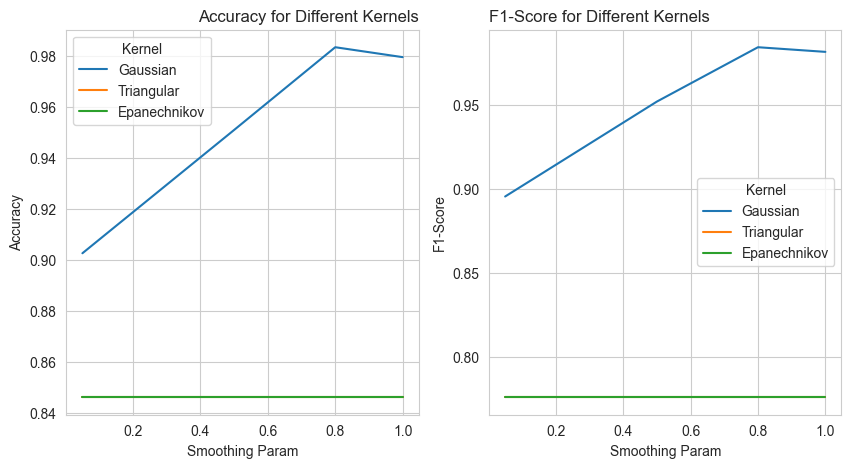

Best combination - Kernel: Gaussian Smoothing Parameter: 0.8
Accuracy: 0.9834361805781098
Classification Report for the Best Combination:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2604
           1       0.94      0.95      0.94       436
           2       0.56      0.74      0.64        39

    accuracy                           0.98      3079
   macro avg       0.83      0.89      0.86      3079
weighted avg       0.99      0.98      0.98      3079



In [98]:
#Candidate Kernels

best_accuracy = 0
best_kernel = None
best_sigma = None
best_pred = None

kernels = ['Gaussian','Triangular','Epanechnikov'];
sigmas = [0.05,0.5,0.8,1];
sigmasss=[0.05,0.5,1]

results = pd.DataFrame(columns=['Kernel','Smoothing Param','Accuracy','F1-Score'])
for k in kernels:
    if k == 'Gaussian':
        k_func = gaussian
    elif k == 'Triangular':
        k_func = triangle
    else:
        k_func = epanechnikov

    for b in sigmas:
        pred = pnn(X_train, Y_train, X_test, k_func, b)
        accuracy = accuracy_score(Y_test.values, pred)  # Use Y_test directly
        f1 = f1_score(Y_test.values, pred, average='weighted')  # Use Y_test directly
        results.loc[len(results.index)] = [k, b, accuracy, f1]

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_kernel = k
            best_sigma = b
            best_pred = pred

print(results)

plt.rcParams['figure.figsize'] = [10, 5]
plt.subplot(121)
sns.lineplot(y=results['Accuracy'],x=results['Smoothing Param'],hue=results['Kernel']);
plt.title('Accuracy for Different Kernels',loc='right');

plt.subplot(122)
sns.lineplot(y=results['F1-Score'],x=results['Smoothing Param'],hue=results['Kernel']);
plt.title('F1-Score for Different Kernels',loc='left');

plt.show()

print("Best combination - Kernel:", best_kernel, "Smoothing Parameter:", best_sigma)
print("Accuracy:", best_accuracy)

# Generate classification report for the best combination
best_classification_report = classification_report(Y_test.values, best_pred)
print("Classification Report for the Best Combination:")
print(best_classification_report)


In [99]:
X1 = df_postshap.drop(columns=['Accident_severity'])
y1 = df_postshap['Accident_severity']

In [100]:
# Ensure all DataFrames are properly aligned
df_class_0 = df_postshap[df_postshap['Accident_severity'] == 0]
df_class_1 = df_postshap[df_postshap['Accident_severity'] == 1]
df_class_2 = df_postshap[df_postshap['Accident_severity'] == 2]

In [101]:
print(len(df_class_0))
print(len(df_class_1))
print(len(df_class_2))

10415
1743
158


In [102]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers


# Assuming df_postshap is your DataFrame
df_class_0 = df_postshap[df_postshap['Accident_severity'] == 0]
df_class_1 = df_postshap[df_postshap['Accident_severity'] == 1]
df_class_2 = df_postshap[df_postshap['Accident_severity'] == 2]

In [103]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df_postshap is your DataFrame
df_class_0 = df_postshap[df_postshap['Accident_severity'] == 0]
df_class_1 = df_postshap[df_postshap['Accident_severity'] == 1]
df_class_2 = df_postshap[df_postshap['Accident_severity'] == 2]

print("Original class distribution:")
print(f"Class 0: {len(df_class_0)}")
print(f"Class 1: {len(df_class_1)}")
print(f"Class 2: {len(df_class_2)}")

# Identify minority classes
minority_class_1 = df_class_1
minority_class_2 = df_class_2

# Prepare the data
X = df_postshap.drop('Accident_severity', axis=1)
y = df_postshap['Accident_severity']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the generator network
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, output_dim),
        )
    
    def forward(self, x):
        return self.model(x)

# Define the discriminator network
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    
    def forward(self, x):
        return self.model(x)

# Parameters
input_dim = 100
output_dim = X_scaled.shape[1]
lr = 0.0002
batch_size = 32
n_epochs = 1000

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def train_wgan(minority_class, class_label, input_dim, output_dim, lr, batch_size, n_epochs):
    # Initialize models
    generator = Generator(input_dim, output_dim).to(device)
    discriminator = Discriminator(output_dim).to(device)

    # Loss and optimizer
    optimizer_g = optim.RMSprop(generator.parameters(), lr=lr)
    optimizer_d = optim.RMSprop(discriminator.parameters(), lr=lr)

    # Prepare the data loader
    minority_class_scaled = scaler.transform(minority_class.drop('Accident_severity', axis=1))
    minority_class_tensor = torch.tensor(minority_class_scaled, dtype=torch.float32).to(device)
    data_loader = DataLoader(minority_class_tensor, batch_size=batch_size, shuffle=True)

    for epoch in range(n_epochs):
        for real_samples in data_loader:
            # Train discriminator
            real_samples = real_samples.to(device)
            current_batch_size = real_samples.size(0)
            
            # Generate fake samples
            noise = torch.randn(current_batch_size, input_dim).to(device)
            fake_samples = generator(noise).detach()
            
            # Compute discriminator loss
            d_loss = -torch.mean(discriminator(real_samples)) + torch.mean(discriminator(fake_samples))
            
            optimizer_d.zero_grad()
            d_loss.backward()
            optimizer_d.step()
            
            # Weight clipping for WGAN
            for p in discriminator.parameters():
                p.data.clamp_(-0.01, 0.01)
            
            # Train generator
            noise = torch.randn(current_batch_size, input_dim).to(device)
            generated_samples = generator(noise)
            g_loss = -torch.mean(discriminator(generated_samples))
            
            optimizer_g.zero_grad()
            g_loss.backward()
            optimizer_g.step()
        
        if epoch % 100 == 0:
            print(f'Class {class_label} - Epoch [{epoch}/{n_epochs}] | D Loss: {d_loss.item()} | G Loss: {g_loss.item()}')

    return generator

# Train WGAN for both minority classes
generator_1 = train_wgan(minority_class_1, 1, input_dim, output_dim, lr, batch_size, n_epochs)
generator_2 = train_wgan(minority_class_2, 2, input_dim, output_dim, lr, batch_size, n_epochs)

# Generate synthetic samples for both minority classes
def generate_synthetic_samples(generator, num_samples):
    noise = torch.randn(num_samples, input_dim).to(device)
    synthetic_samples = generator(noise).cpu().detach().numpy()
    return synthetic_samples

num_samples_to_generate_1 = len(df_class_0) - len(minority_class_1)
num_samples_to_generate_2 = len(df_class_0) - len(minority_class_2)

synthetic_samples_1 = generate_synthetic_samples(generator_1, num_samples_to_generate_1)
synthetic_samples_2 = generate_synthetic_samples(generator_2, num_samples_to_generate_2)

# Inverse transform the synthetic samples
synthetic_samples_1_original = scaler.inverse_transform(synthetic_samples_1)
synthetic_samples_2_original = scaler.inverse_transform(synthetic_samples_2)

# Create DataFrames for synthetic samples
synthetic_df_1 = pd.DataFrame(synthetic_samples_1_original, columns=X.columns)
synthetic_df_1['Accident_severity'] = 1
synthetic_df_2 = pd.DataFrame(synthetic_samples_2_original, columns=X.columns)
synthetic_df_2['Accident_severity'] = 2

# Combine the original DataFrame and the synthetic samples
df_balanced = pd.concat([df_postshap, synthetic_df_1, synthetic_df_2], axis=0, ignore_index=True)

print("\nBalanced class distribution:")
print(df_balanced['Accident_severity'].value_counts())



Original class distribution:
Class 0: 10415
Class 1: 1743
Class 2: 158
Class 1 - Epoch [0/1000] | D Loss: -0.014848321676254272 | G Loss: -0.4970884919166565
Class 1 - Epoch [100/1000] | D Loss: 0.0014638304710388184 | G Loss: -0.5050509572029114
Class 1 - Epoch [200/1000] | D Loss: -0.009944170713424683 | G Loss: -0.48131263256073
Class 1 - Epoch [300/1000] | D Loss: -0.0050695836544036865 | G Loss: -0.4863472282886505
Class 1 - Epoch [400/1000] | D Loss: -0.0064445436000823975 | G Loss: -0.4927017390727997
Class 1 - Epoch [500/1000] | D Loss: -0.006112217903137207 | G Loss: -0.4980188012123108
Class 1 - Epoch [600/1000] | D Loss: -0.0026150941848754883 | G Loss: -0.49258333444595337
Class 1 - Epoch [700/1000] | D Loss: -0.0052679479122161865 | G Loss: -0.49775251746177673
Class 1 - Epoch [800/1000] | D Loss: -0.001971334218978882 | G Loss: -0.49789518117904663
Class 1 - Epoch [900/1000] | D Loss: -0.0028228461742401123 | G Loss: -0.49470365047454834
Class 2 - Epoch [0/1000] | D Loss:

In [104]:
oversampled_data=df_balanced

In [107]:
oversampled_df =df_balanced

In [108]:
oversampled_df.to_csv('oversampled_data.csv', index=False)

In [126]:
x=df_balanced.drop("Accident_severity",axis=1)

In [127]:
y=df_balanced.Accident_severity

In [128]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=24,stratify=y)

In [129]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

23433
7812
23433
7812


In [137]:
X_train=x_train
X_test=x_test
Y_train=y_train
Y_test=y_test

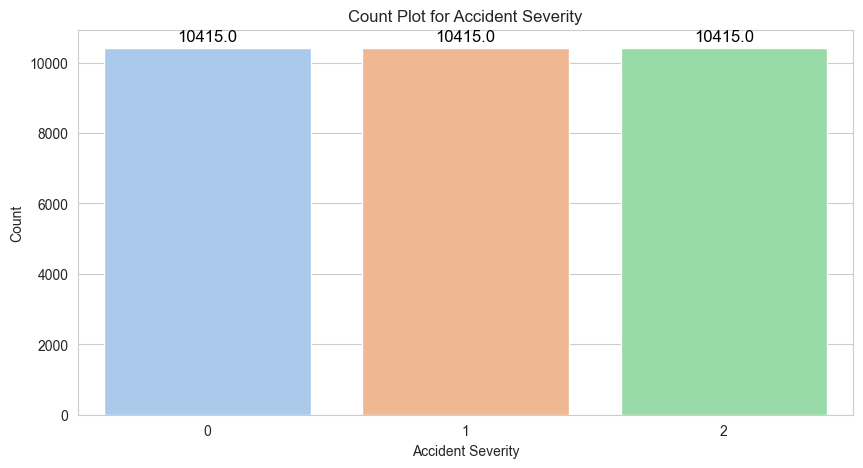

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a light color palette with different colors for each class
palette = sns.color_palette("pastel")

# Create a count plot for the "Accident_severity" column with the custom palette
ax = sns.countplot(data=df_balanced, x="Accident_severity", palette=palette)

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Add a title and labels for better readability
plt.title("Count Plot for Accident Severity")
plt.xlabel("Accident Severity")
plt.ylabel("Count")

# Show the plot
plt.show()
